In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(color_codes=True)

In [3]:
# reading the training data
train_data= pd.read_csv(r"F:\E_files\Health_Insurance_cross_cell_pred\train2\train.csv")
train_data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


# Description  of the data :


# id	- Unique ID for the customer
# Gender - 	Gender of the customer
# Age	- Age of the customer
# Driving_License- 	0 : Customer does not have DL, 1 : Customer already has DL
# Region_Code- 	Unique code for the region of the customer
# Previously_Insured- 	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
# Vehicle_Age- 	Age of the Vehicle
# Vehicle_Damage- 	1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
# Annual_Premium- 	The amount customer needs to pay as premium in the year
# Policy_Sales_Channel- 	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
# Vintage- 	Number of Days, Customer has been associated with the company
# Response- 	1 : Customer is interested, 0 : Customer is not interested

In [4]:
val_drivlicense= train_data["Driving_License"].unique()
print("Values that the column Driving License can take",val_drivlicense)
print()
val_regioncode=  train_data["Region_Code"].unique()
print("Values that the  Region_code can take",sorted(val_regioncode))
print()
val_previouslyinsured= train_data["Previously_Insured"].unique()
print("Values that the  Previously_Insured can take",val_previouslyinsured)
print()
val_vehicledamage= train_data["Vehicle_Damage"].unique()
print("Values that the  Vehicle_Damage can take",val_vehicledamage)
print()
val_saleschannel= train_data["Policy_Sales_Channel"].unique()
print("Values that the  Policy_Sales_Channel can take",sorted(val_saleschannel))

Values that the column Driving License can take [1 0]

Values that the  Region_code can take [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0]

Values that the  Previously_Insured can take [0 1]

Values that the  Vehicle_Damage can take ['Yes' 'No']

Values that the  Policy_Sales_Channel can take [1.0, 2.0, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 73.0, 74.0, 75.0, 76.0, 78.0, 

In [5]:
# reading the test dataset
test_data= pd.read_csv(r"F:\E_files\Health_Insurance_cross_cell_pred\test2\test.csv")
test_data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


# Exploratory Data Analysis

In [6]:

#values that the column Response Takes
# value of  1 indicates that individual is interested, value of 0 indicates that individual is not interested
val= train_data['Response'].unique()
print(val)

[1 0]


In [7]:
print("length of training data:",len(train_data))
print("Number of people who are interested :",len(train_data[train_data["Response"]==val[0]]))
print("Number of people who are not interested :",len(train_data[train_data["Response"]==val[1]]))
print("You can  look below to know how many are intrested and how many are not")

length of training data: 381109
Number of people who are interested : 46710
Number of people who are not interested : 334399
You can  look below to know how many are intrested and how many are not


# You can  look below to know how many are intrested and how many are not

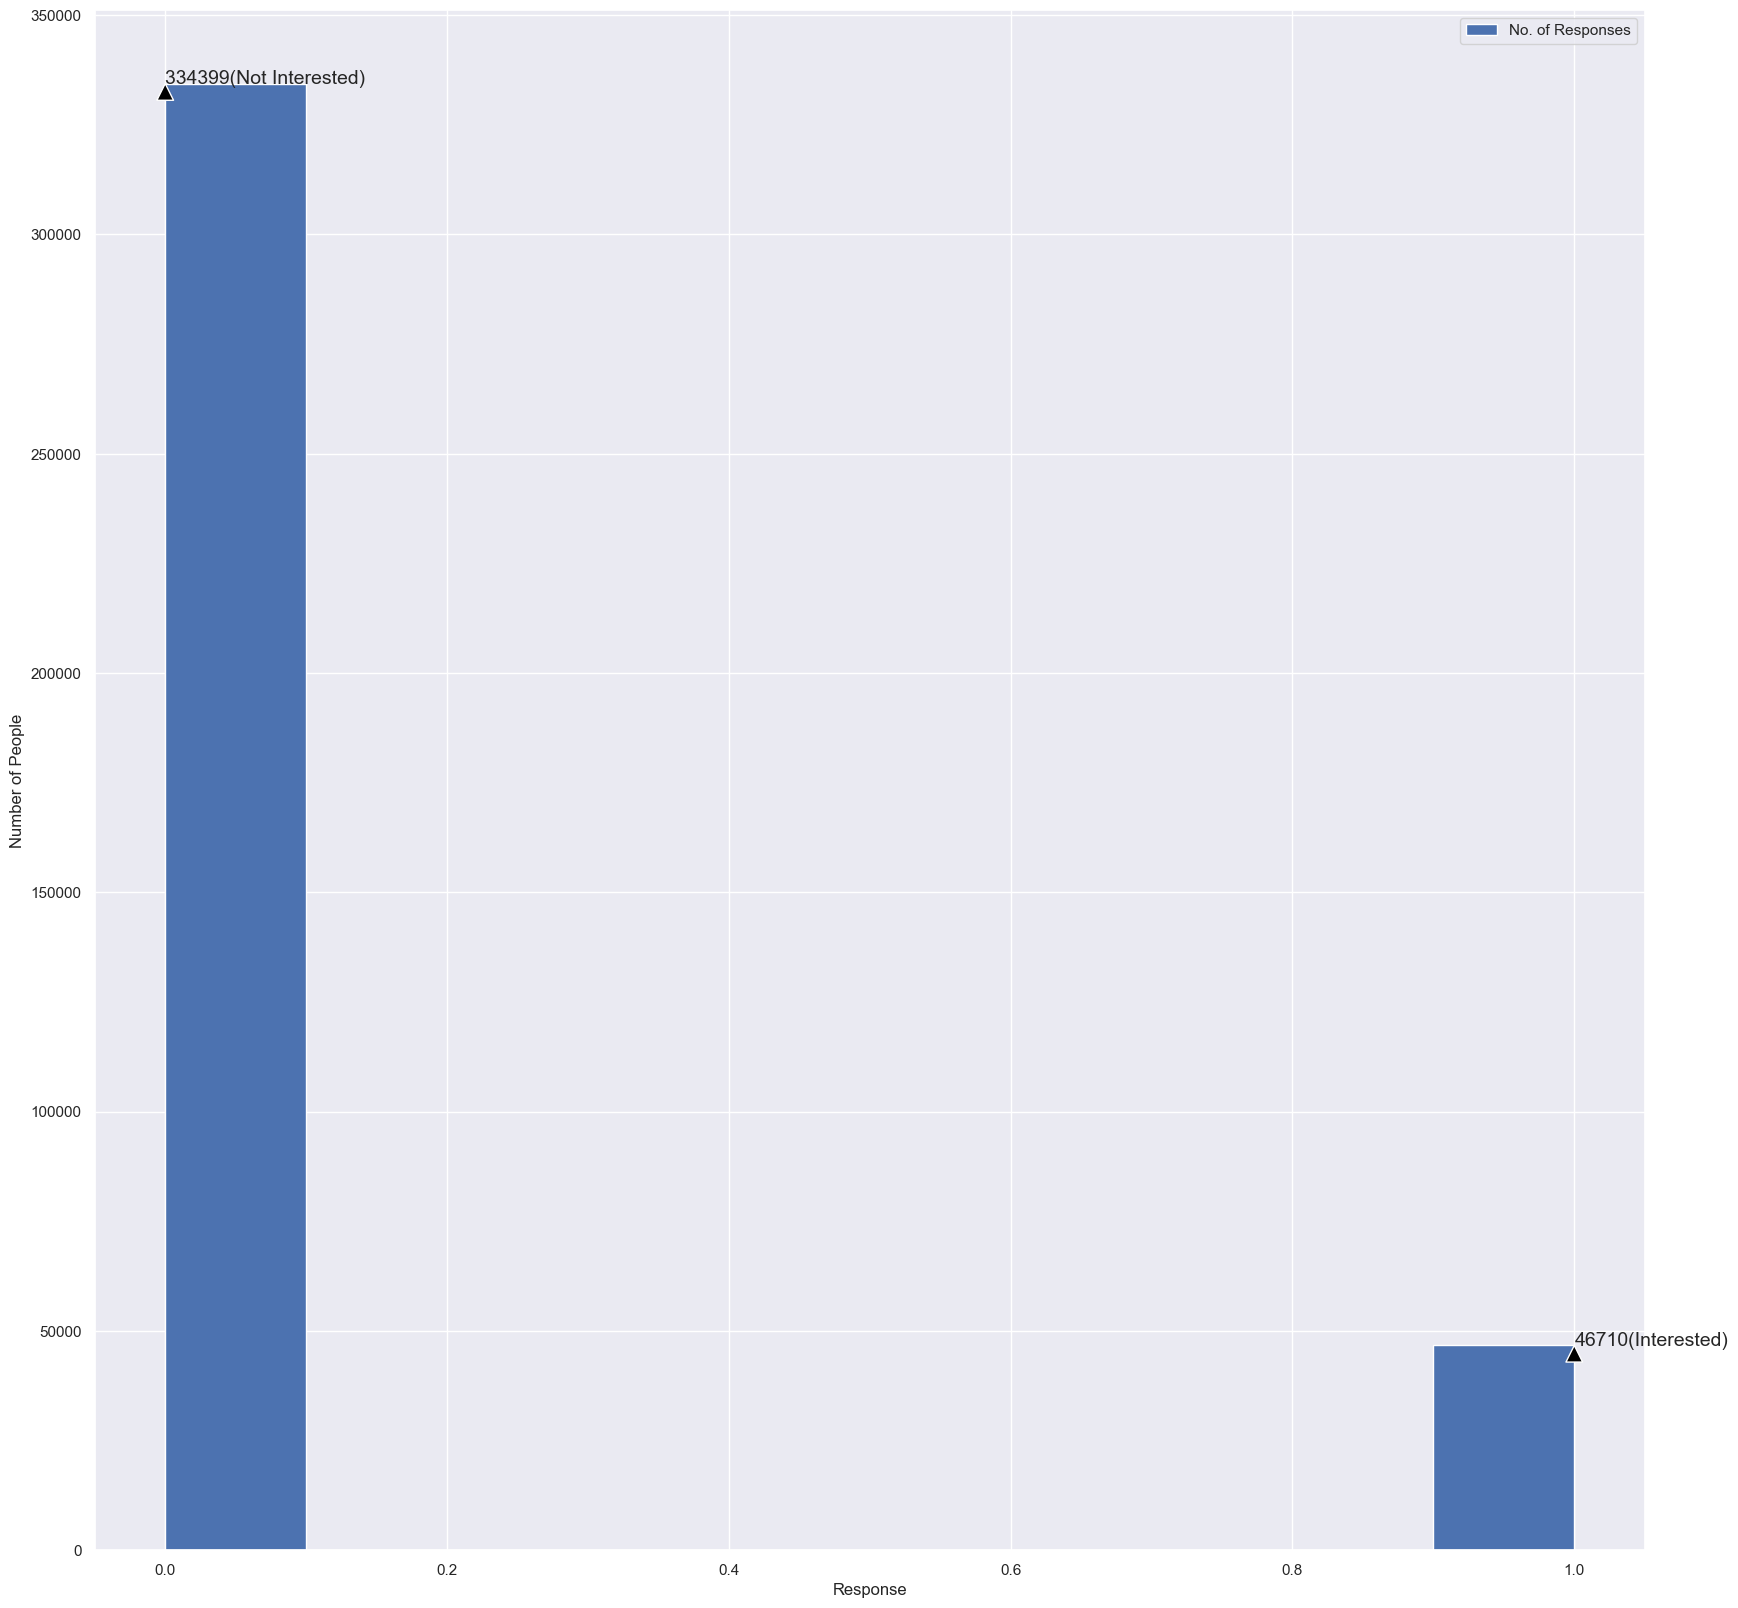

In [8]:
bin_colors = ['blue', 'green']
plt.rcParams['figure.figsize']= [20,20]
plt.rcParams['font.size'] = 14
plt.hist(train_data["Response"],label="No. of Responses")
plt.xlabel("Response")
plt.ylabel("Number of People")
not_intr= str(len(train_data[train_data["Response"]==0]))+"(Not Interested)"
intr= str(len(train_data[train_data["Response"]==1]))+"(Interested)"
plt.annotate(not_intr, xy=(0,len(train_data[train_data["Response"]==0])), 
             arrowprops=dict(facecolor='black', shrink=0.005))
plt.annotate(intr, xy=(1,len(train_data[train_data["Response"]==1])), 
             arrowprops=dict(facecolor='black', shrink=0.005))
plt.legend(loc='upper right')
plt.grid(True)

In [9]:
print("There are more number of people who are uninterested than those who are interested.")

There are more number of people who are uninterested than those who are interested.


There are more number of people who are uninterested than those who are interested

Text(0.5, 1.0, 'Vintage of Different Age Groups')

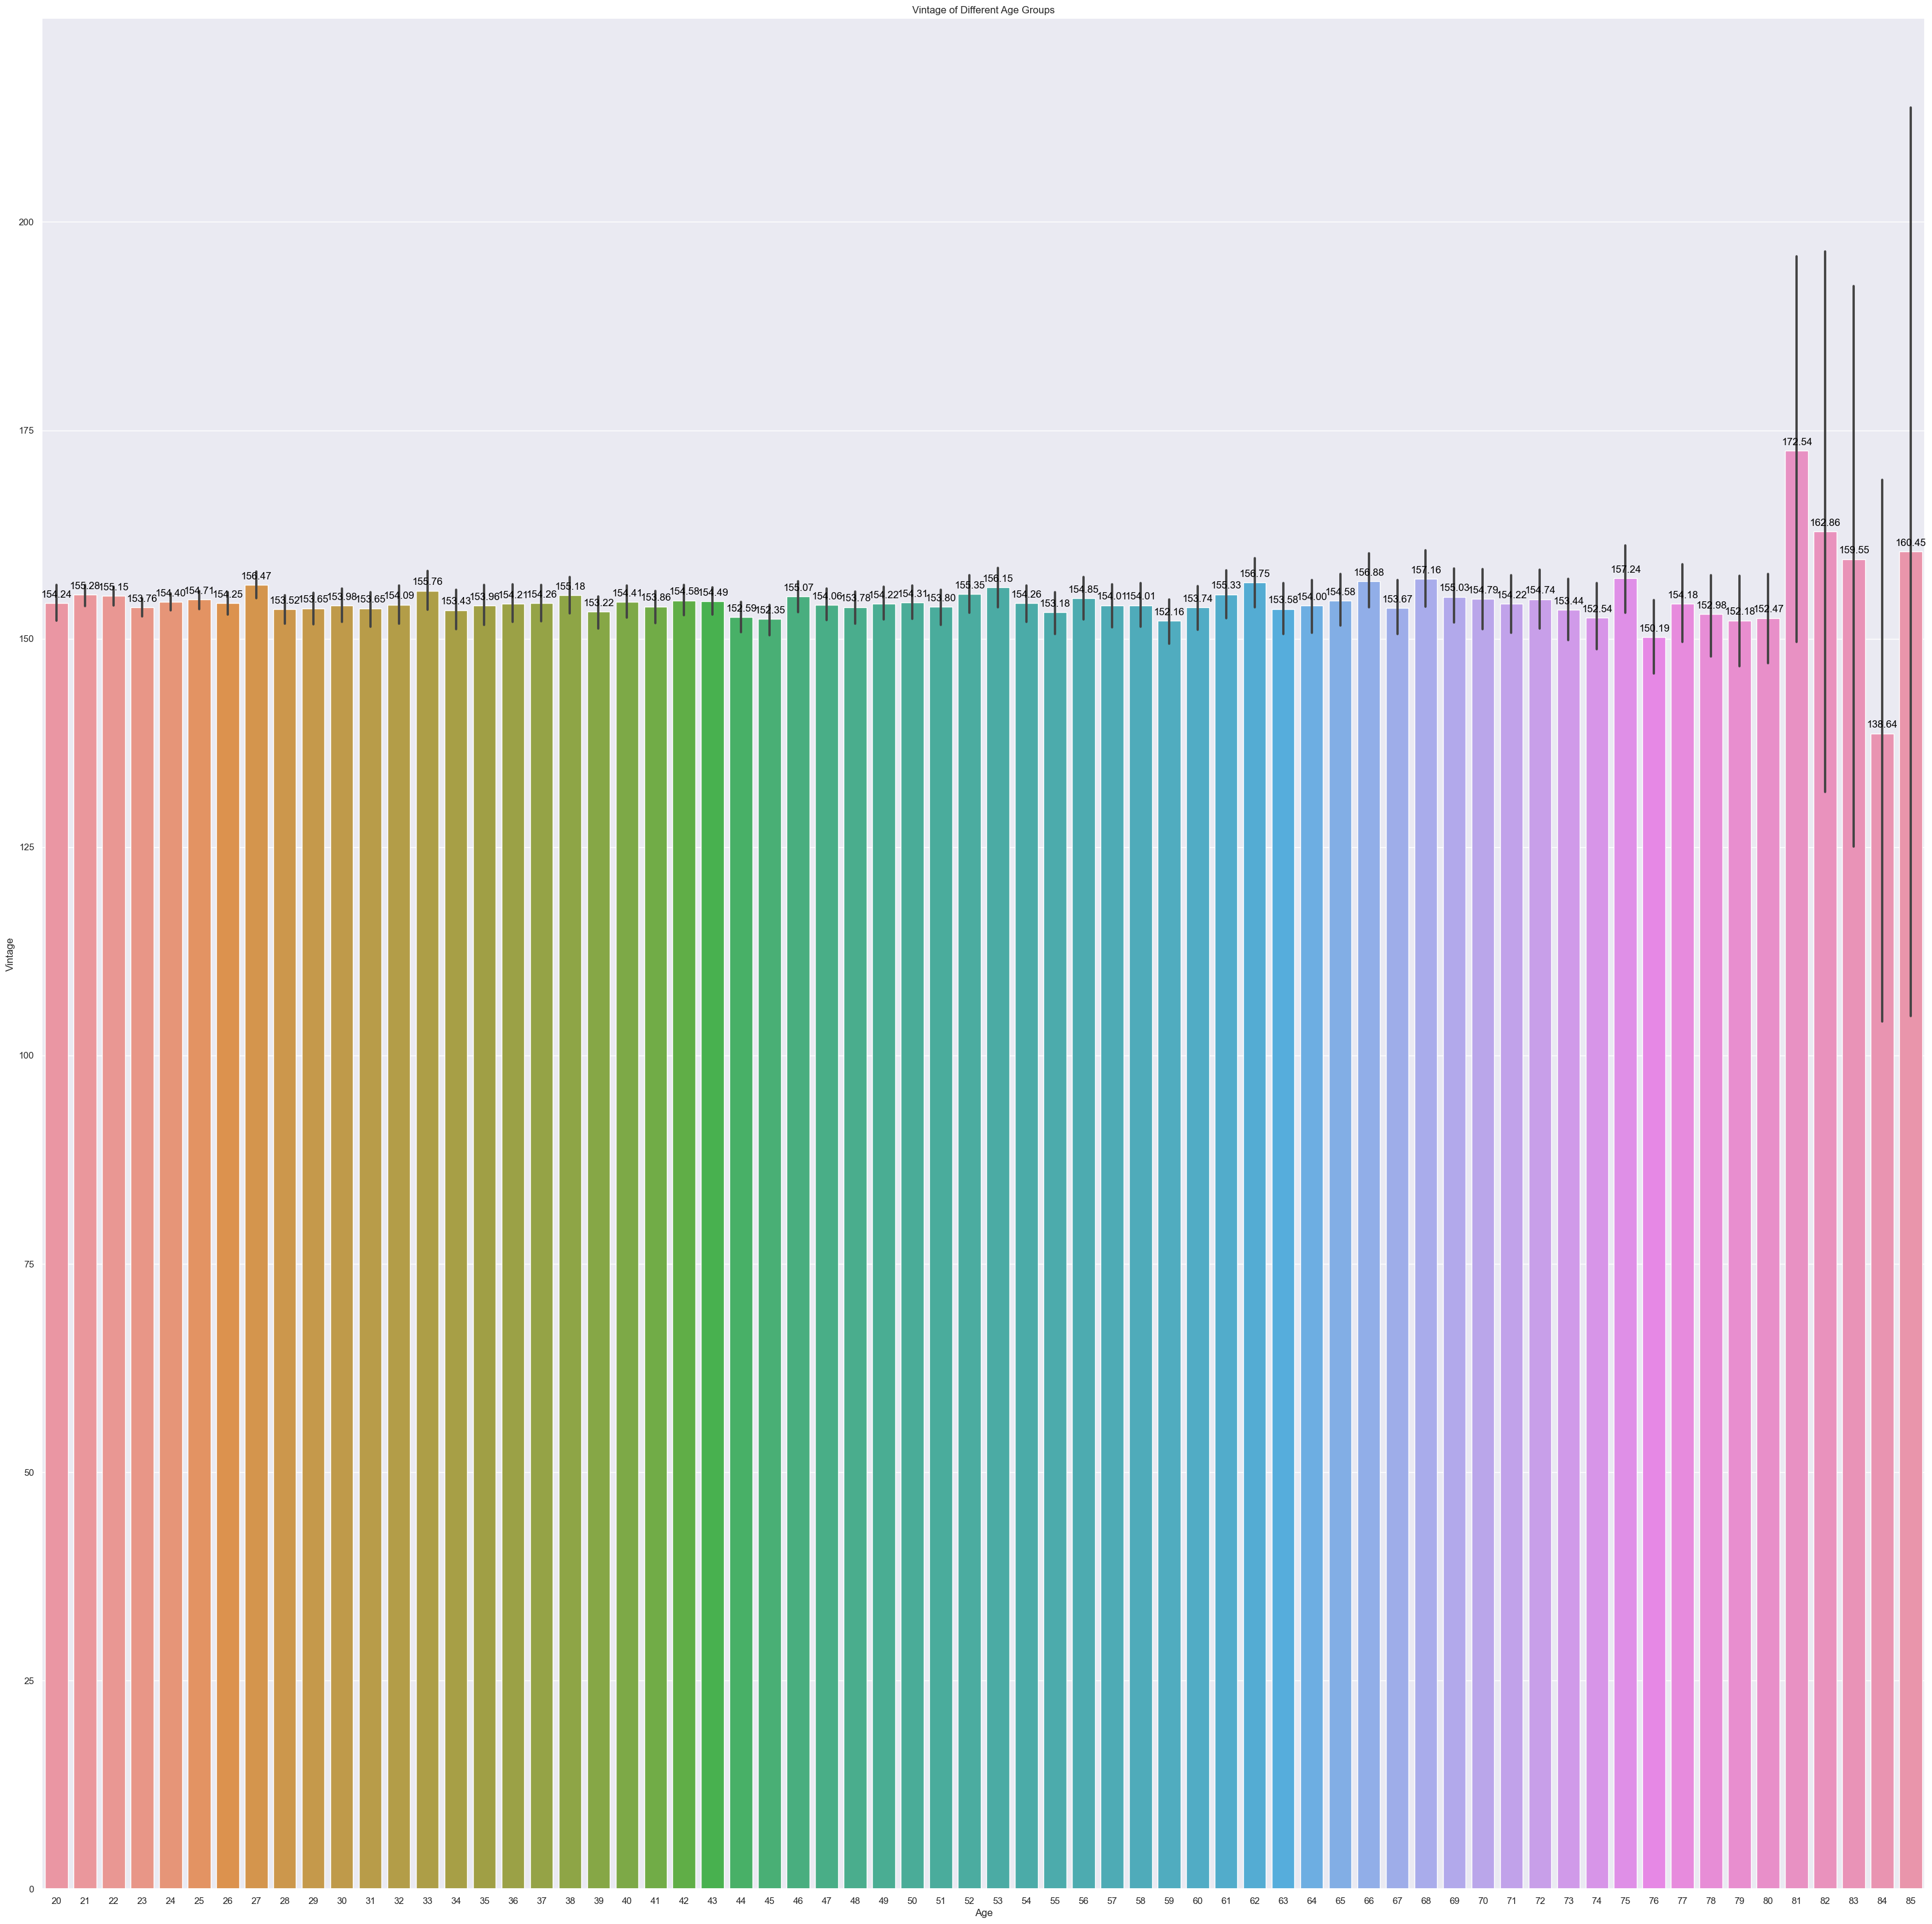

In [10]:
# observing the vintage of different age groups
plt.rcParams['figure.figsize']= [40,40]
ax= sns.barplot(train_data, x="Age",y="Vintage")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.title("Vintage of Different Age Groups")
# vint1= str(len(train_data[train_data["Response"]==0]['Vintage'].value_count()))

In [11]:
arr=[]
for p in ax.patches:
    arr.append(p.get_height())
val_Age= train_data['Age'].unique()
print("The median Vintage from age groups 20 to 61",np.mean(arr[:61]))
print("The median Vintage from age groups 61 to 85",np.mean(arr[61:]))
# print(len(arr))

The median Vintage from age groups 20 to 61 154.23531967898086
The median Vintage from age groups 61 to 85 158.80682937751902


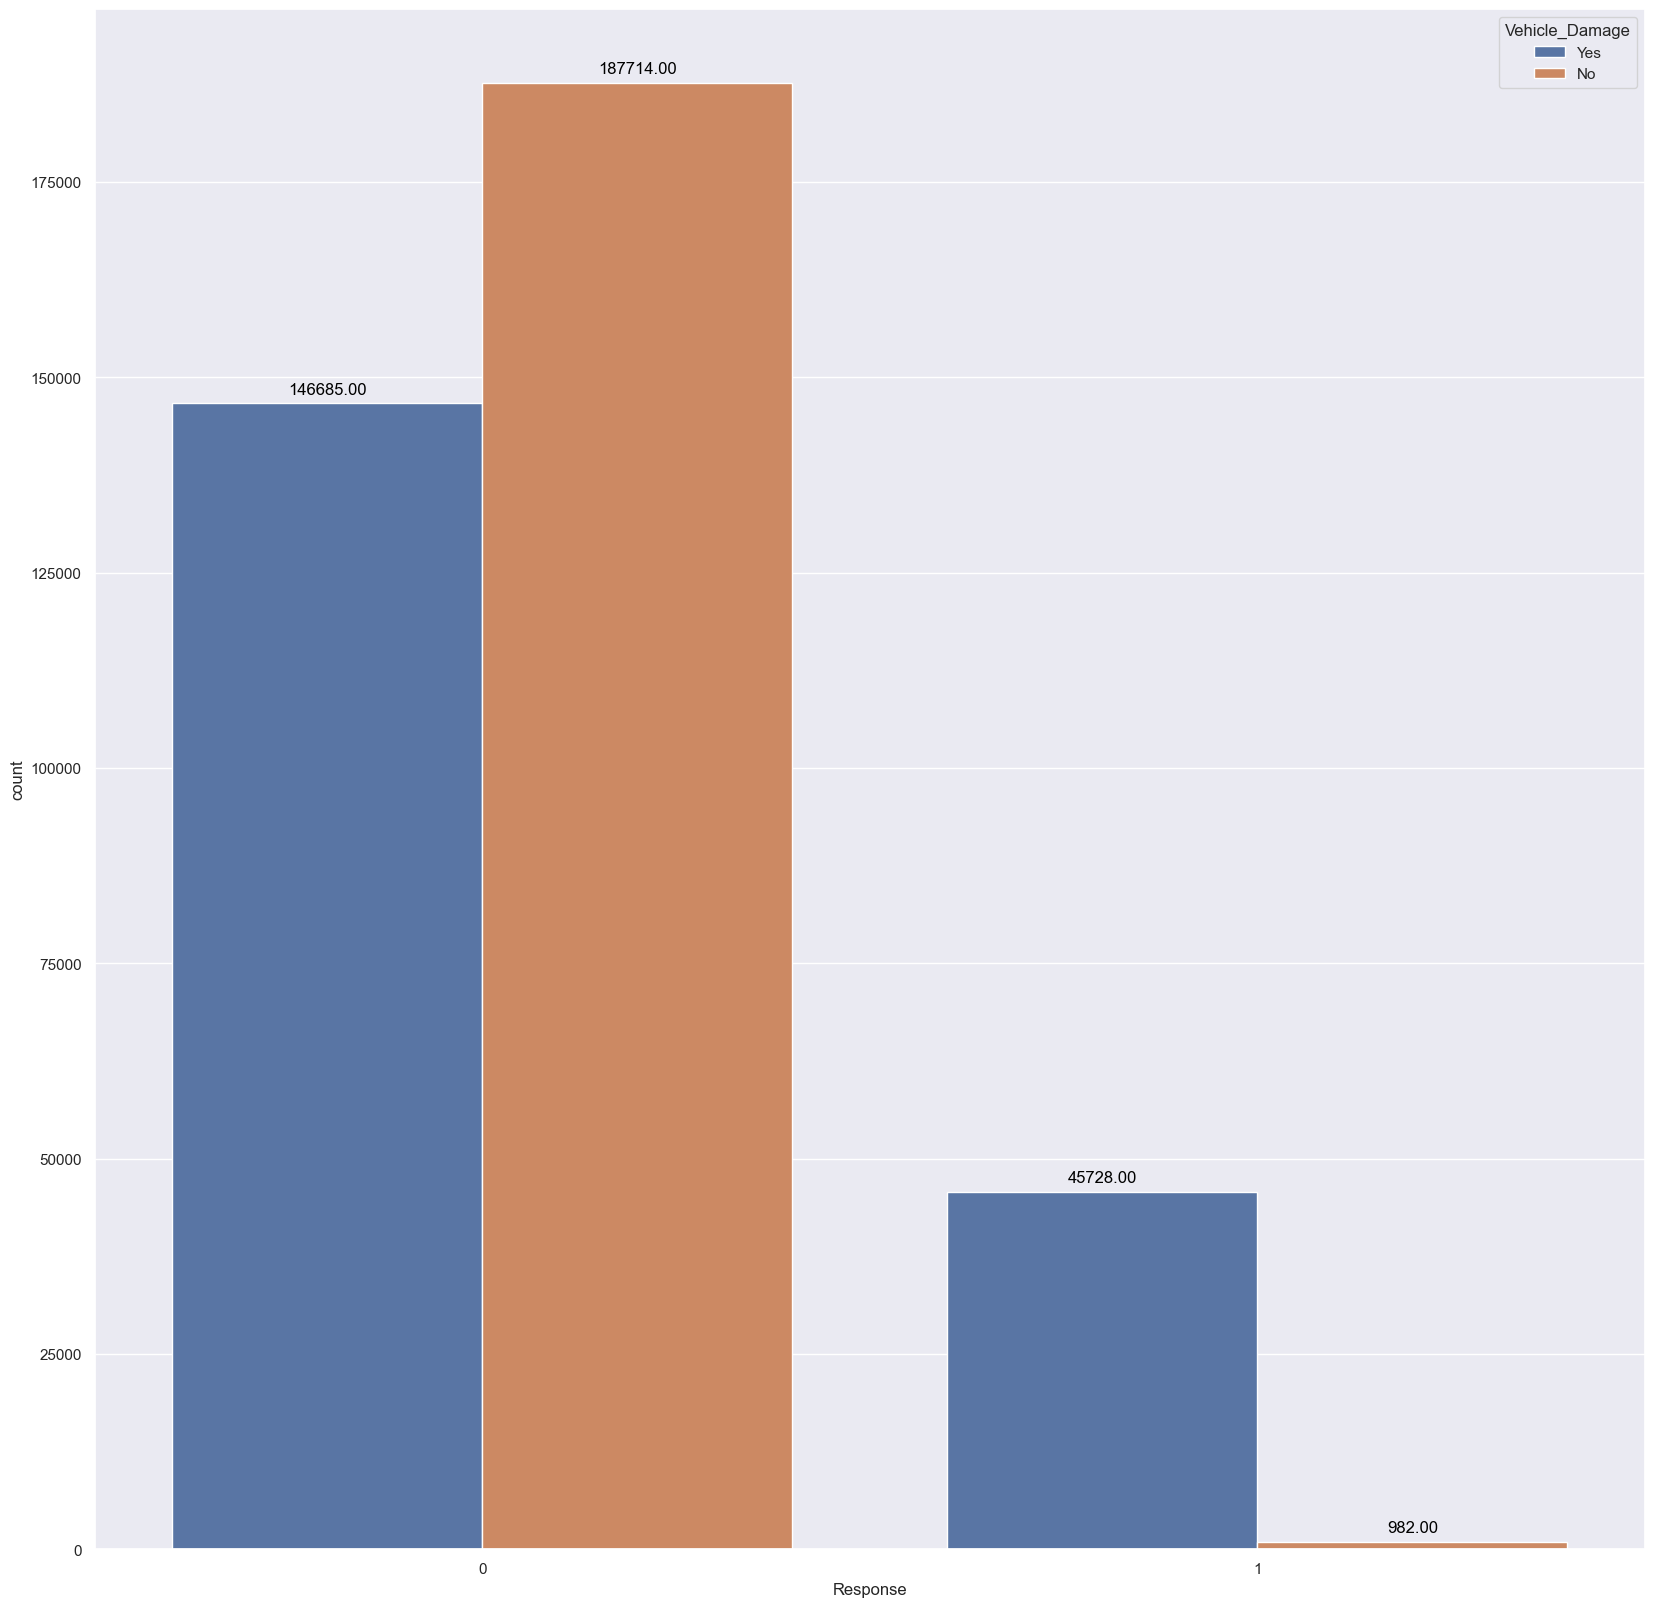

In [12]:
# Observing the number of people whose vehicles are damaged and whose vehicles are not damaged
plt.rcParams['figure.figsize']= [20,20]
plt.rcParams['font.size'] = 14
ax=sns.countplot(train_data,x='Response',hue="Vehicle_Damage")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

In [13]:
print("There are more number of people whose vehicles are damaged and whose vehicles aren't")

There are more number of people whose vehicles are damaged and whose vehicles aren't


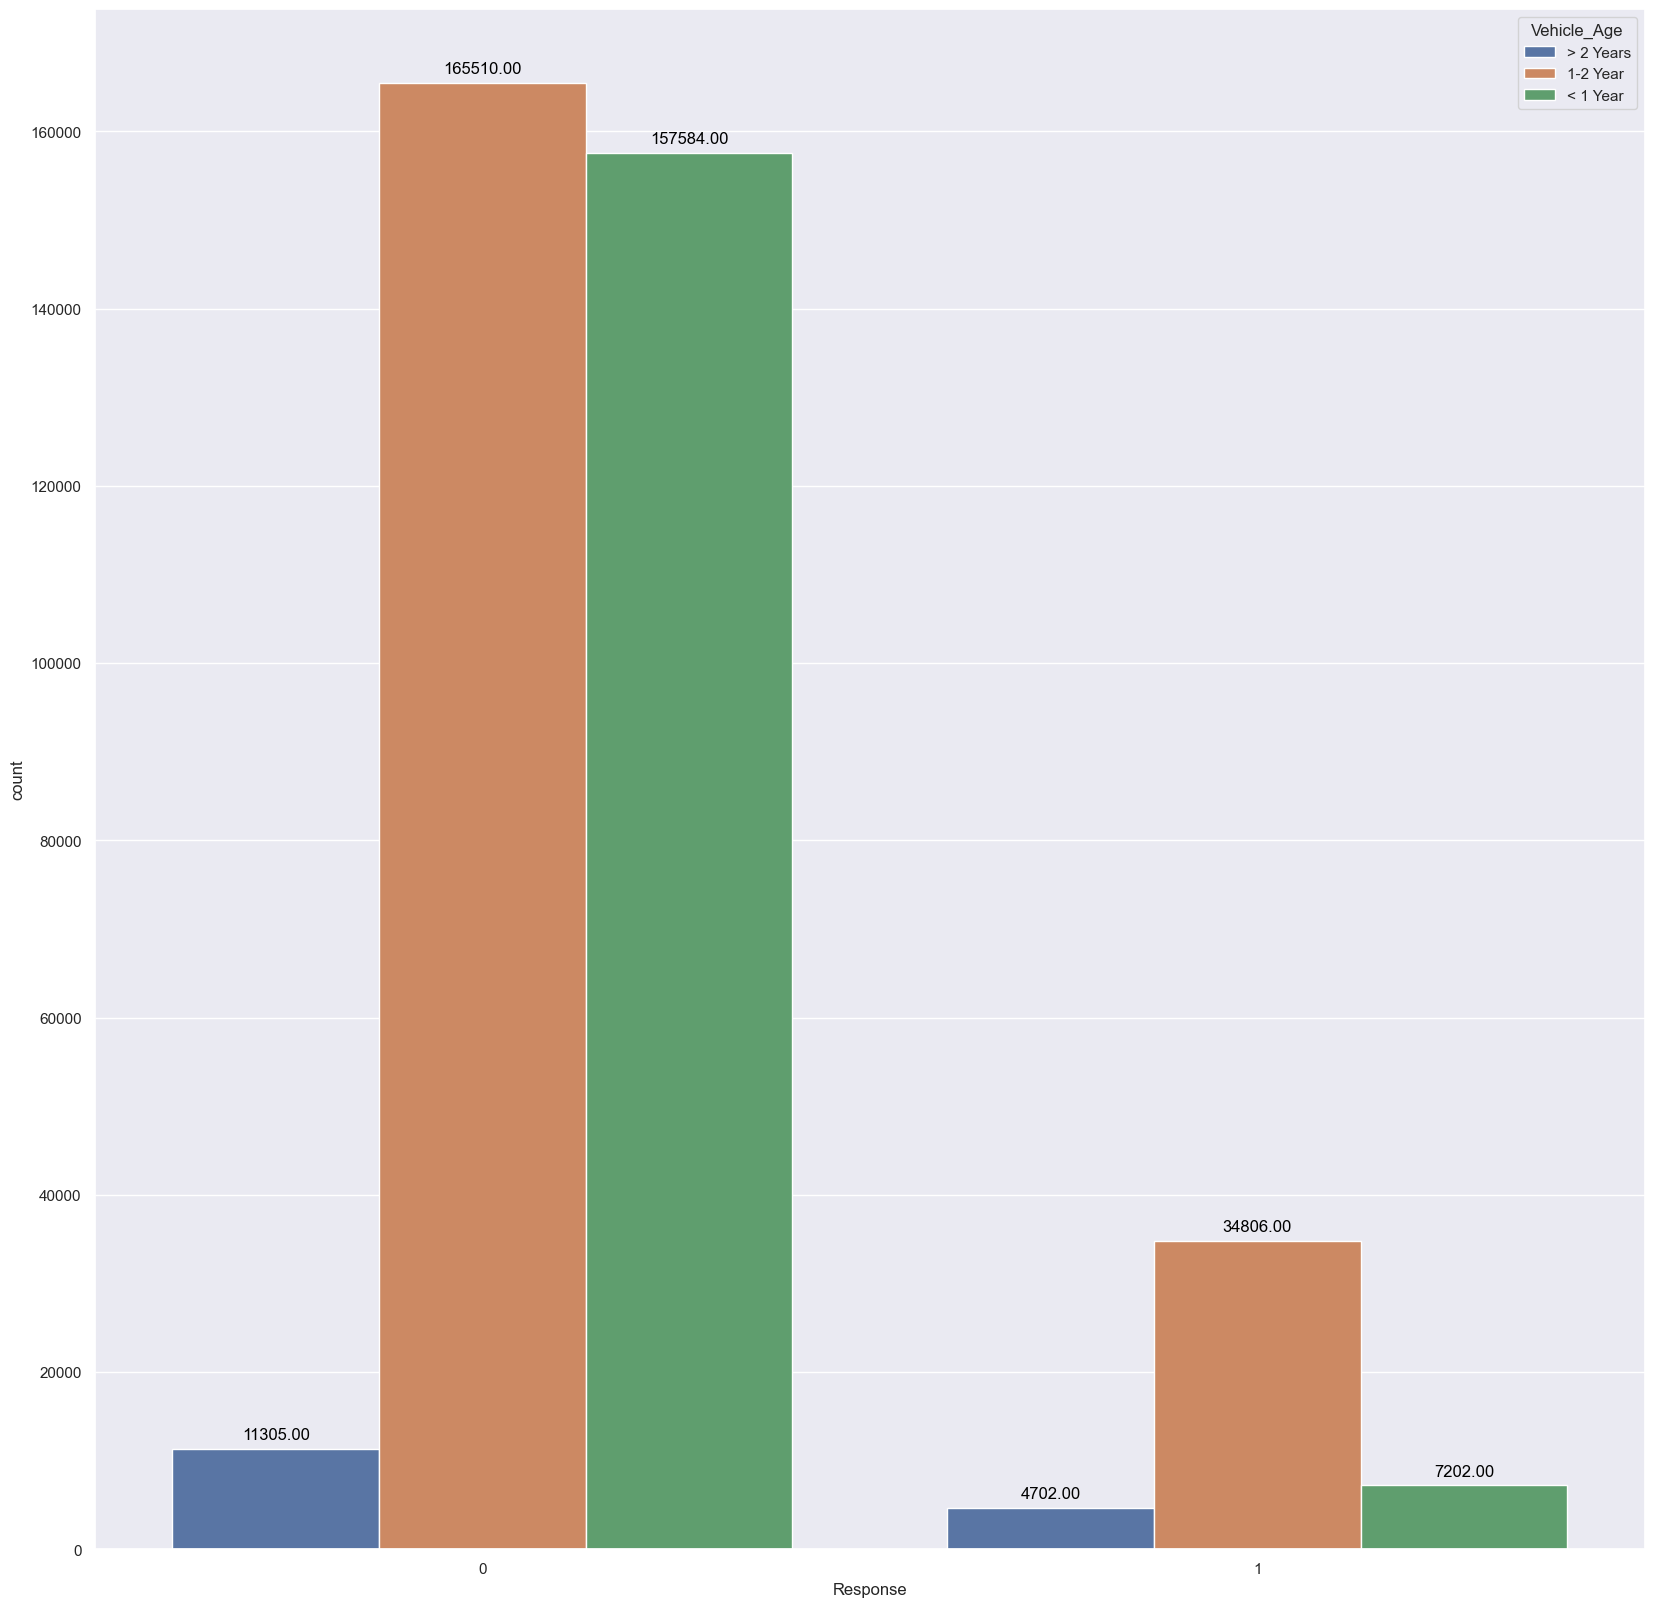

In [14]:
# Observing how old are vehicles of people and comparing how many of them are interested and how many are not interested
plt.rcParams['figure.figsize']= [20,20]
plt.rcParams['font.size'] = 14
ax= sns.countplot(train_data,x='Response',hue="Vehicle_Age")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

In [15]:
print("The vehicle age of most of the people is less than two years")

The vehicle age of most of the people is less than two years


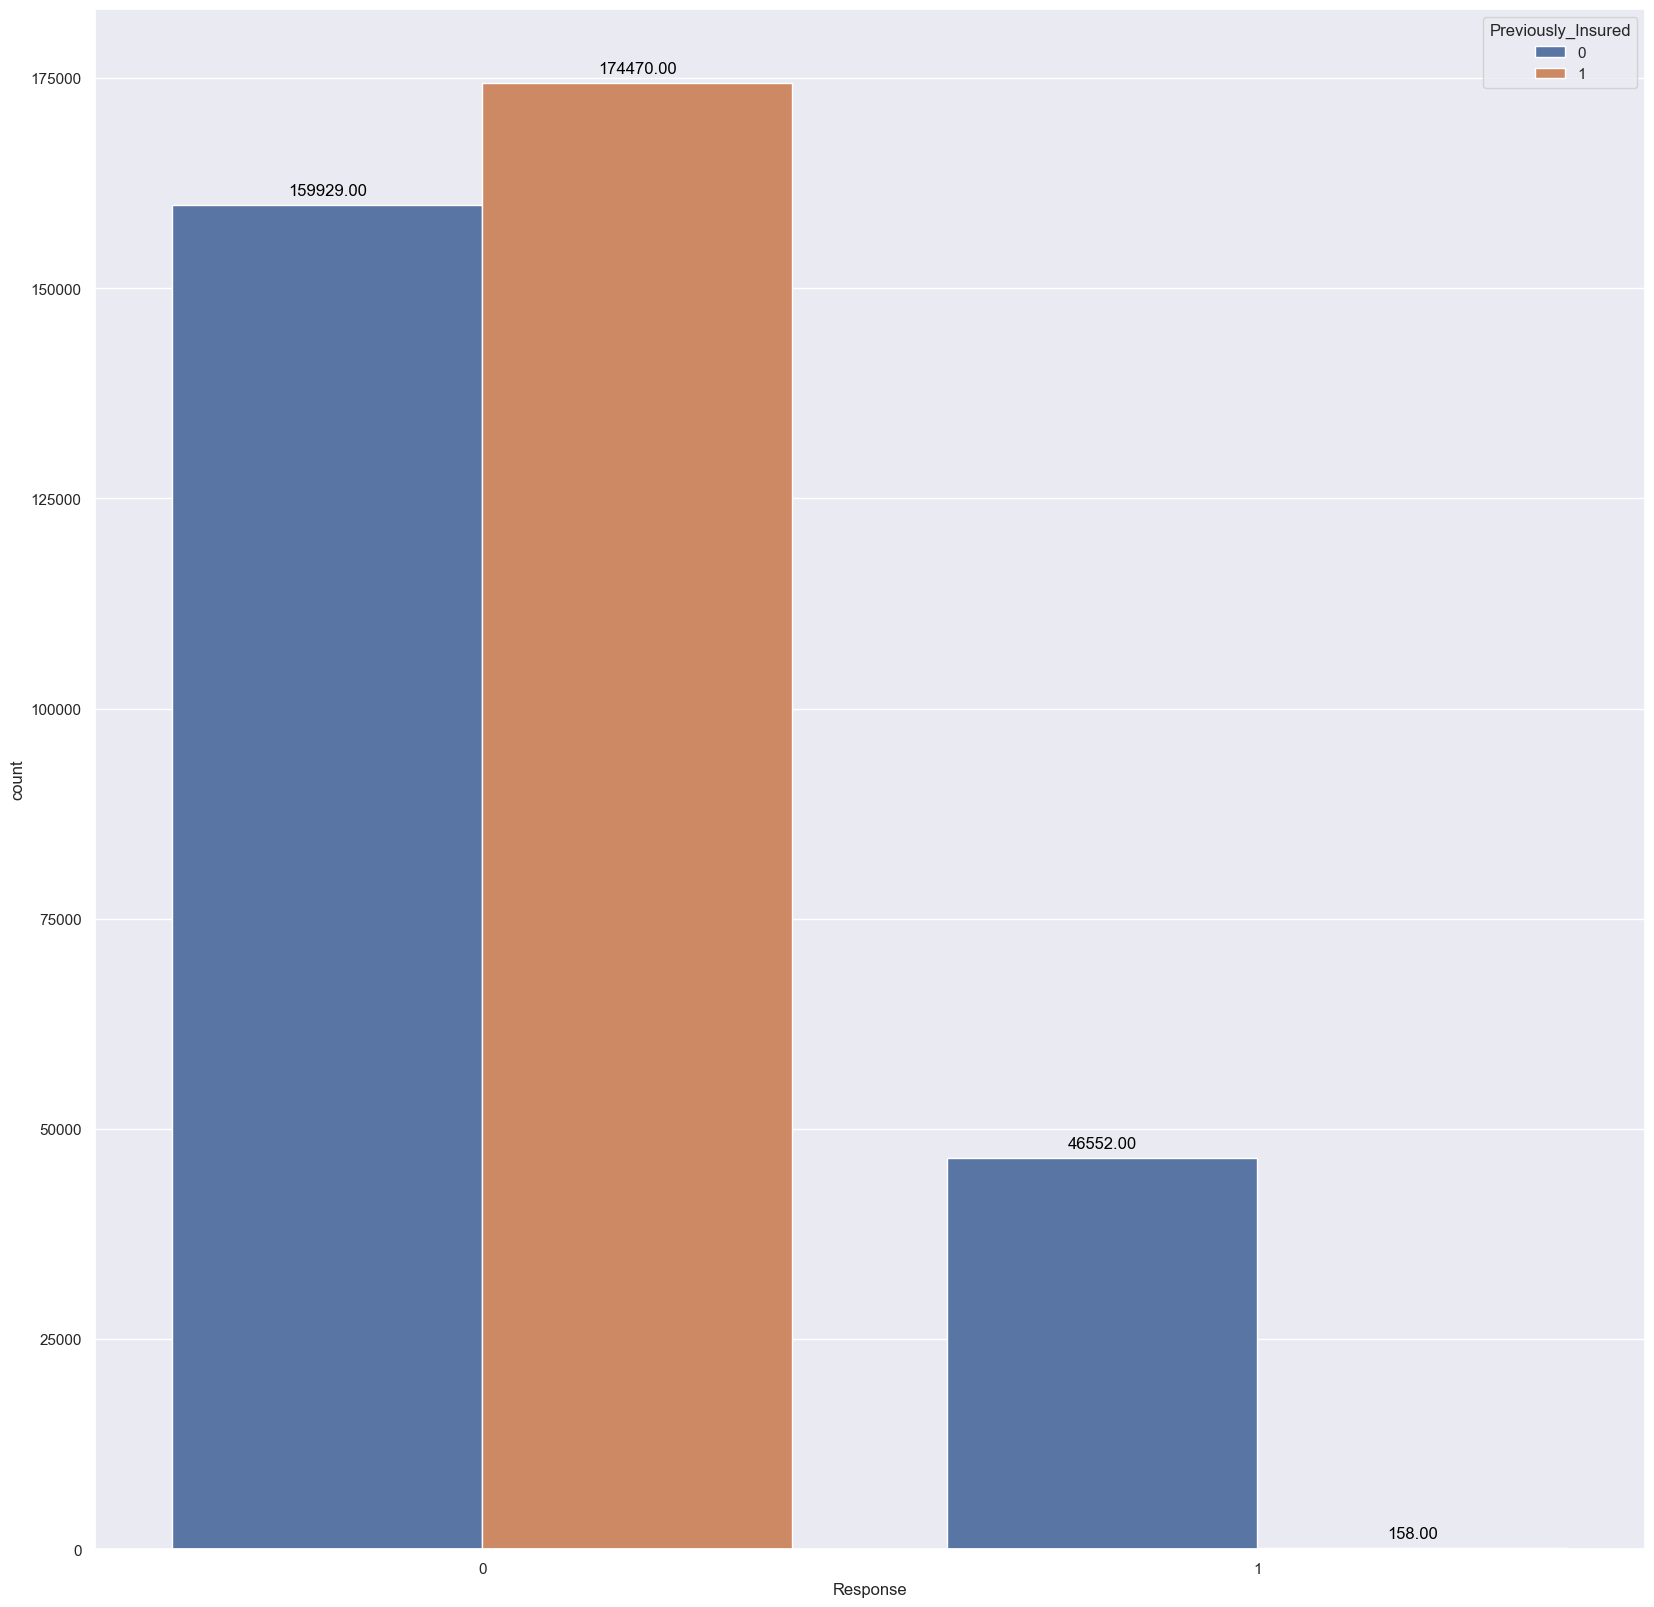

In [16]:
# observing how many are previously insured and among them how many are interested and how many are not interested
plt.rcParams['figure.figsize']= [20,20]
plt.rcParams['font.size'] = 14
ax=sns.countplot(train_data,x='Response',hue="Previously_Insured")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

In [17]:
print("The number of people who are previosly insured are nearly same as the number of people who are not previously insured.")

The number of people who are previosly insured are nearly same as the number of people who are not previously insured.


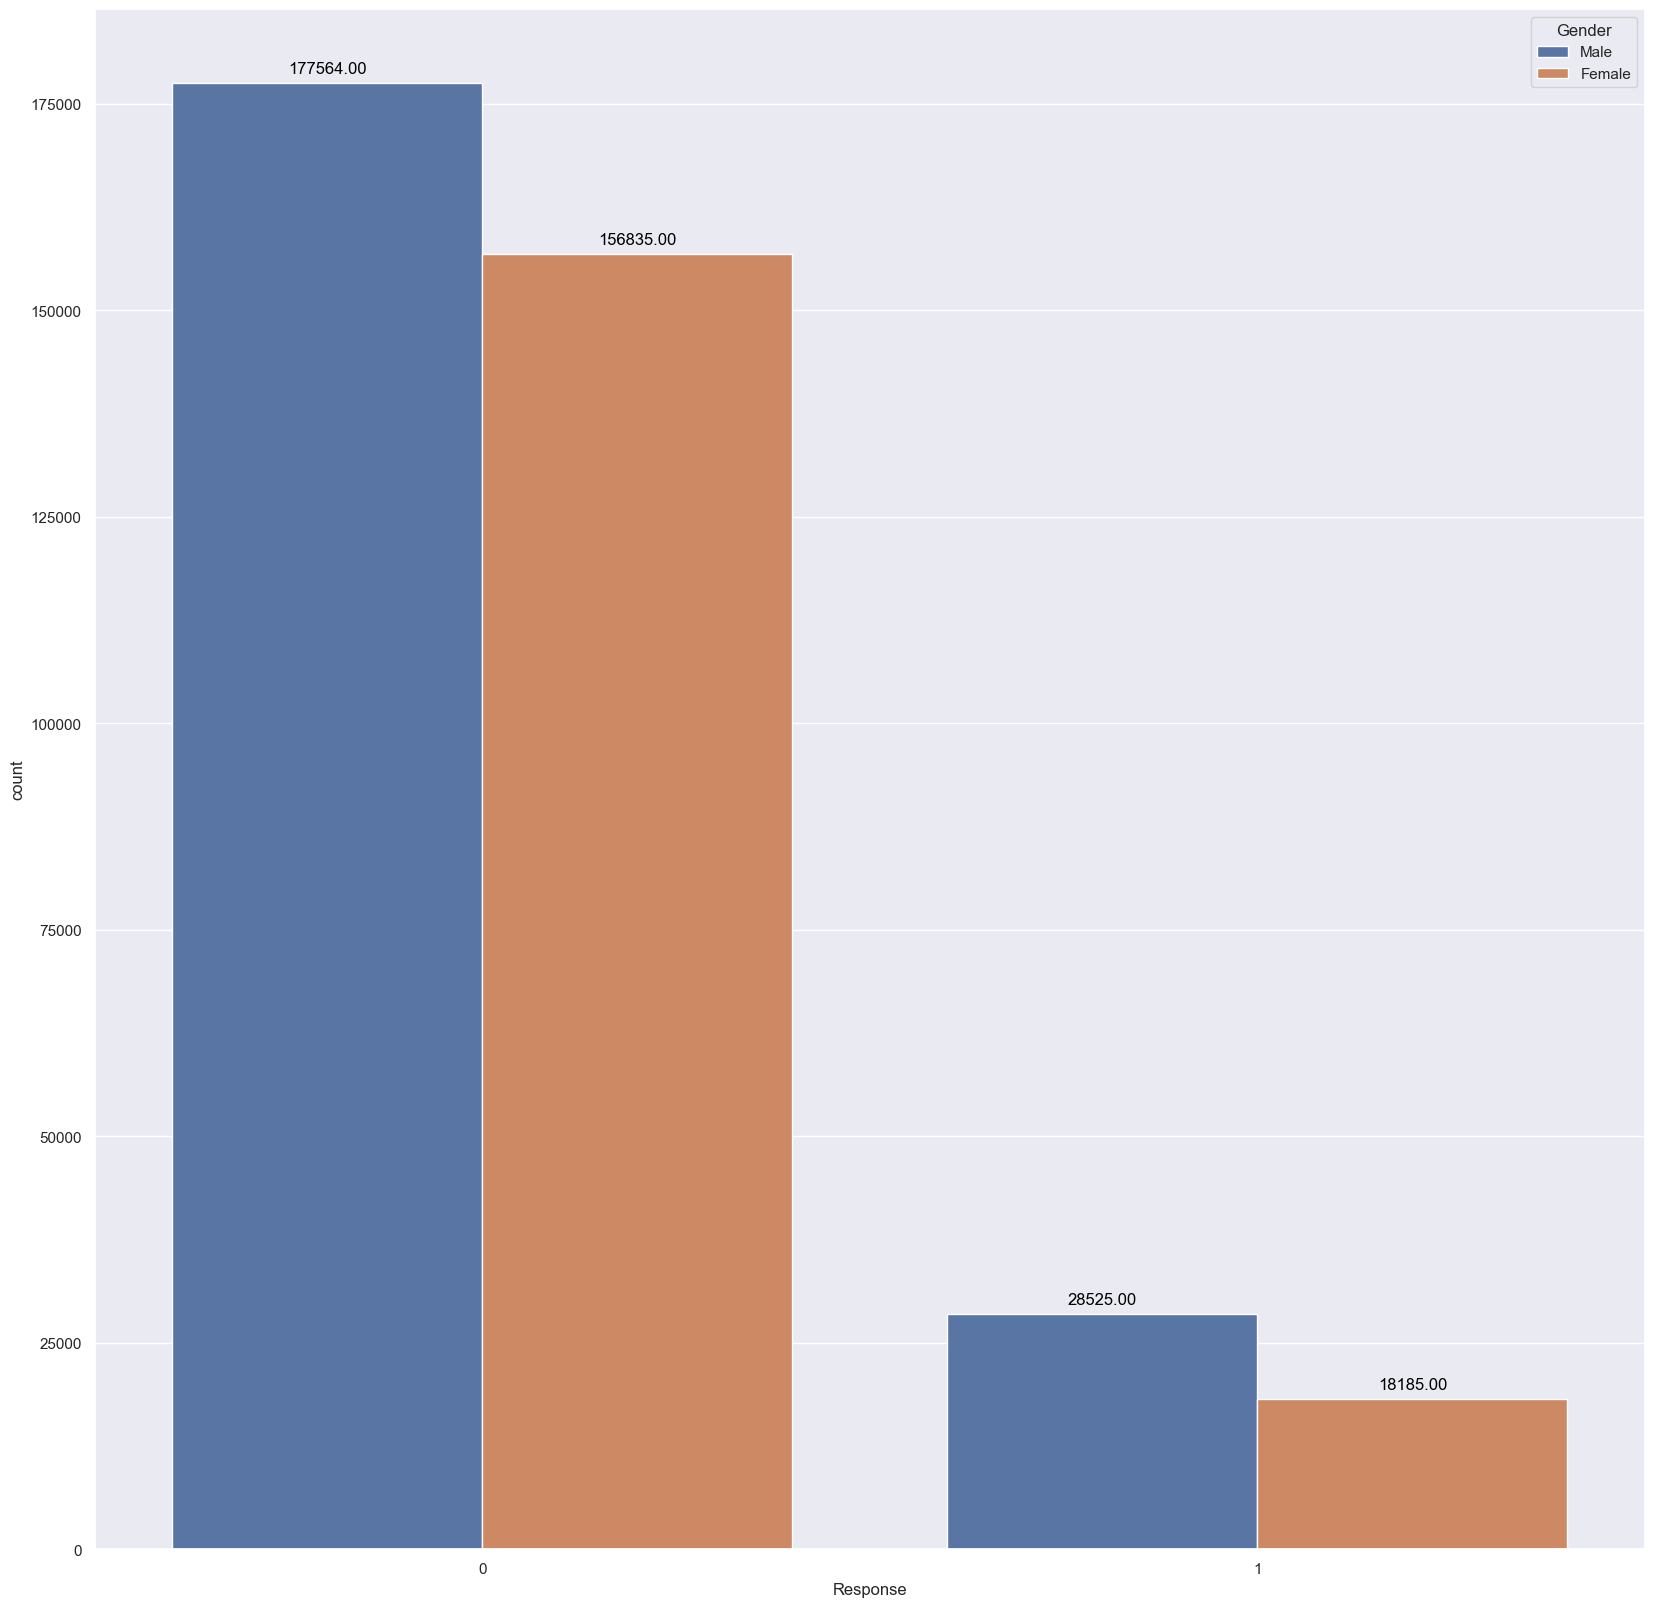

In [19]:
# Observing the distribution of males and females who are interested and not interested
plt.rcParams['figure.figsize']= [20,20]
plt.rcParams['font.size'] = 14
ax= sns.countplot(train_data,x='Response',hue="Gender")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

In [20]:
print("Males are more interested in this insurance than females.")

Males are more interested in this insurance than females.


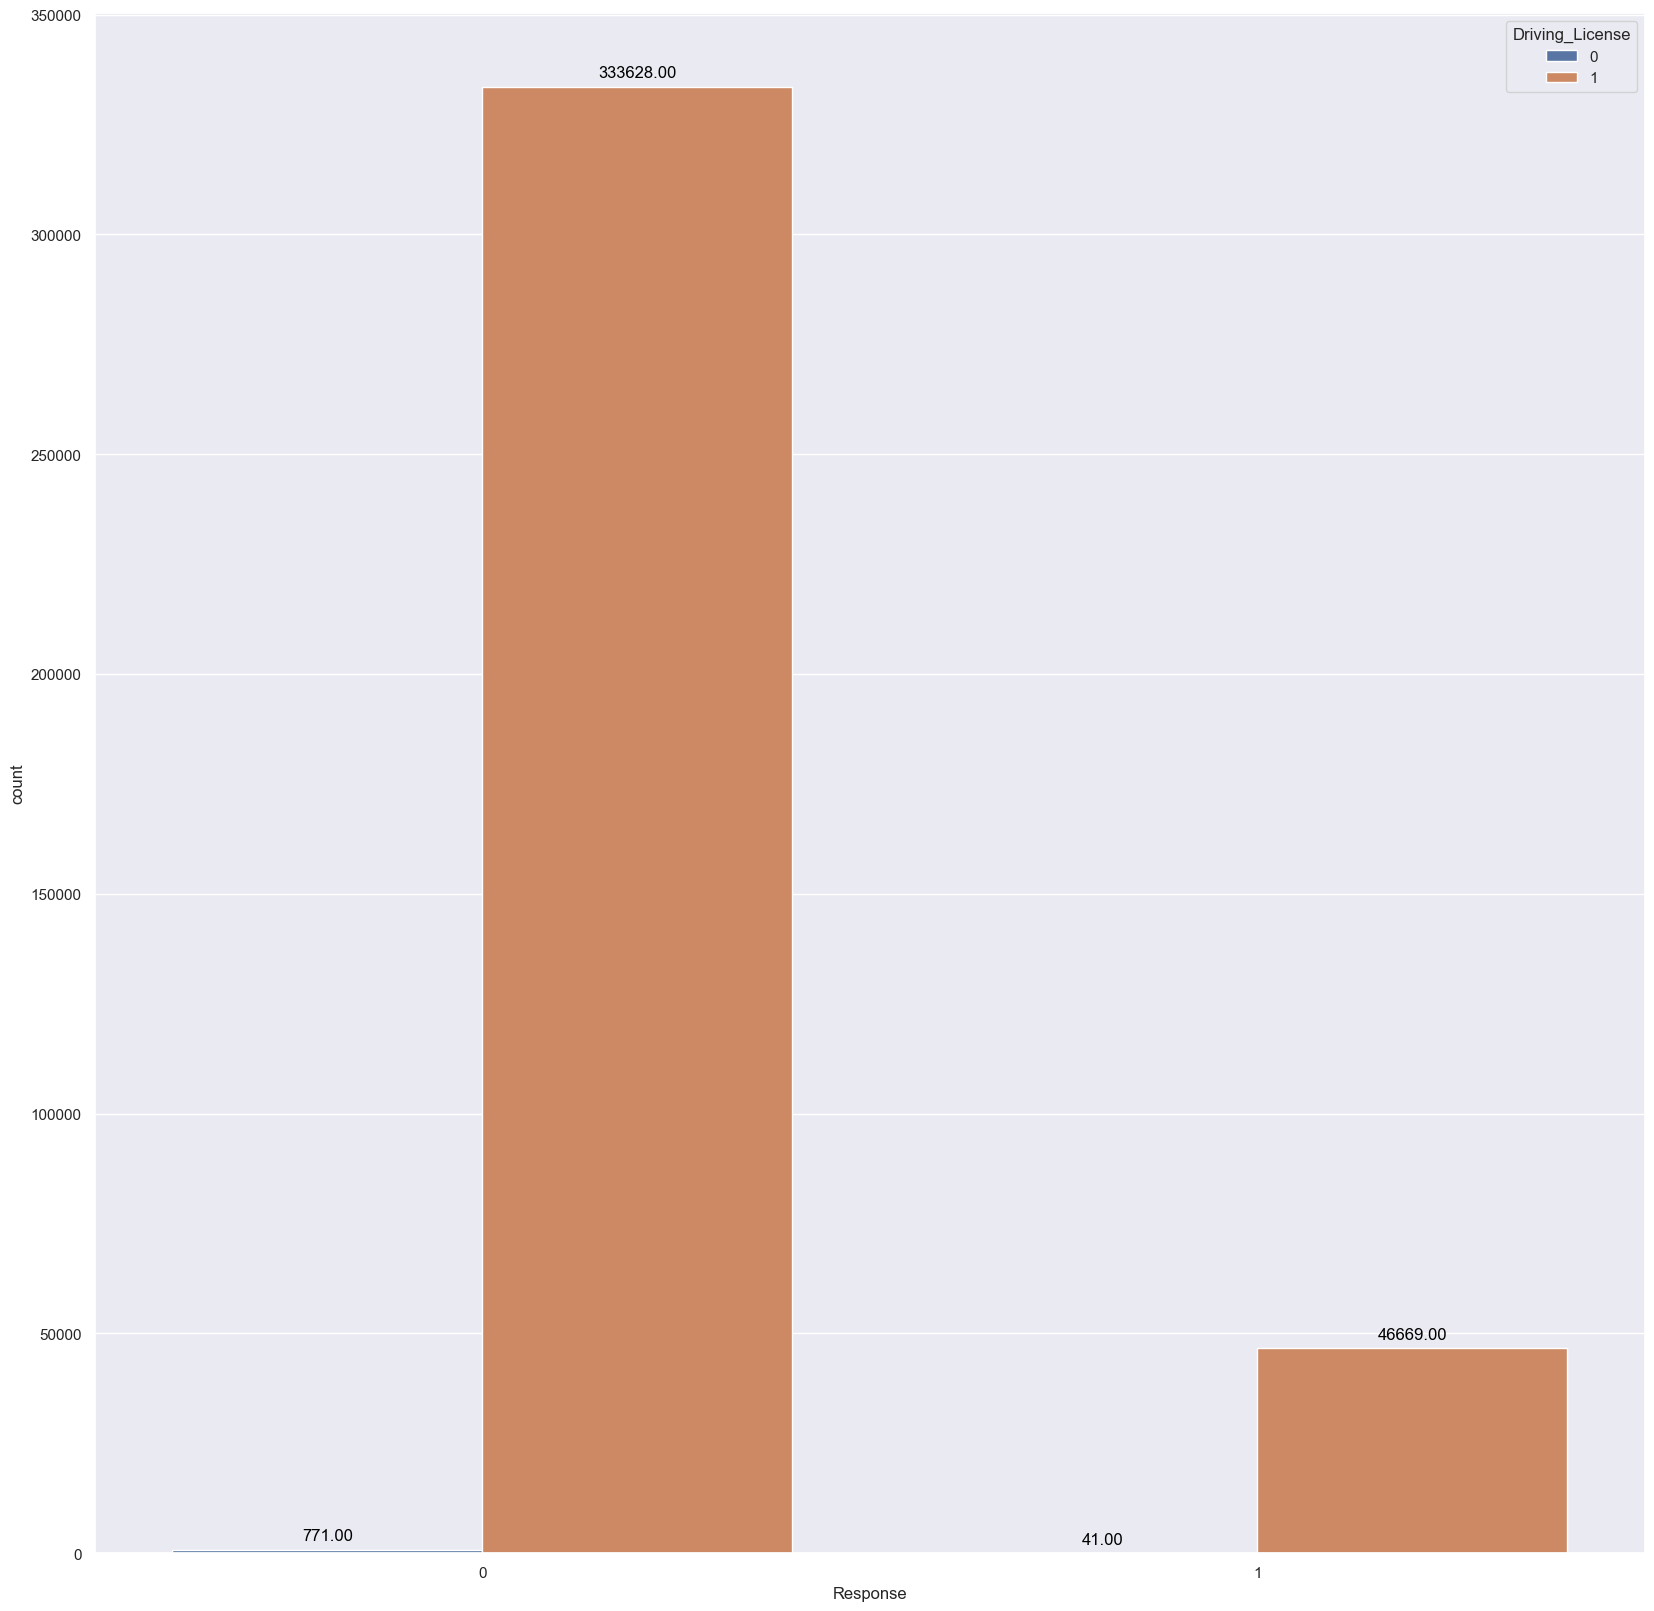

In [21]:
# Observing How many are having driving license and how many not, also aming them how many are interested and how many are not.
plt.rcParams['figure.figsize']= [20,20]
plt.rcParams['font.size'] = 14
ax= sns.countplot(train_data,x='Response',hue="Driving_License")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

In [22]:
print("Most of the people are having Driving License.")

Most of the people are having Driving License.


In [23]:
import warnings

# Suppress Seaborn user warnings
warnings.filterwarnings("ignore", category=UserWarning)

<Axes: xlabel='Age', ylabel='Density'>

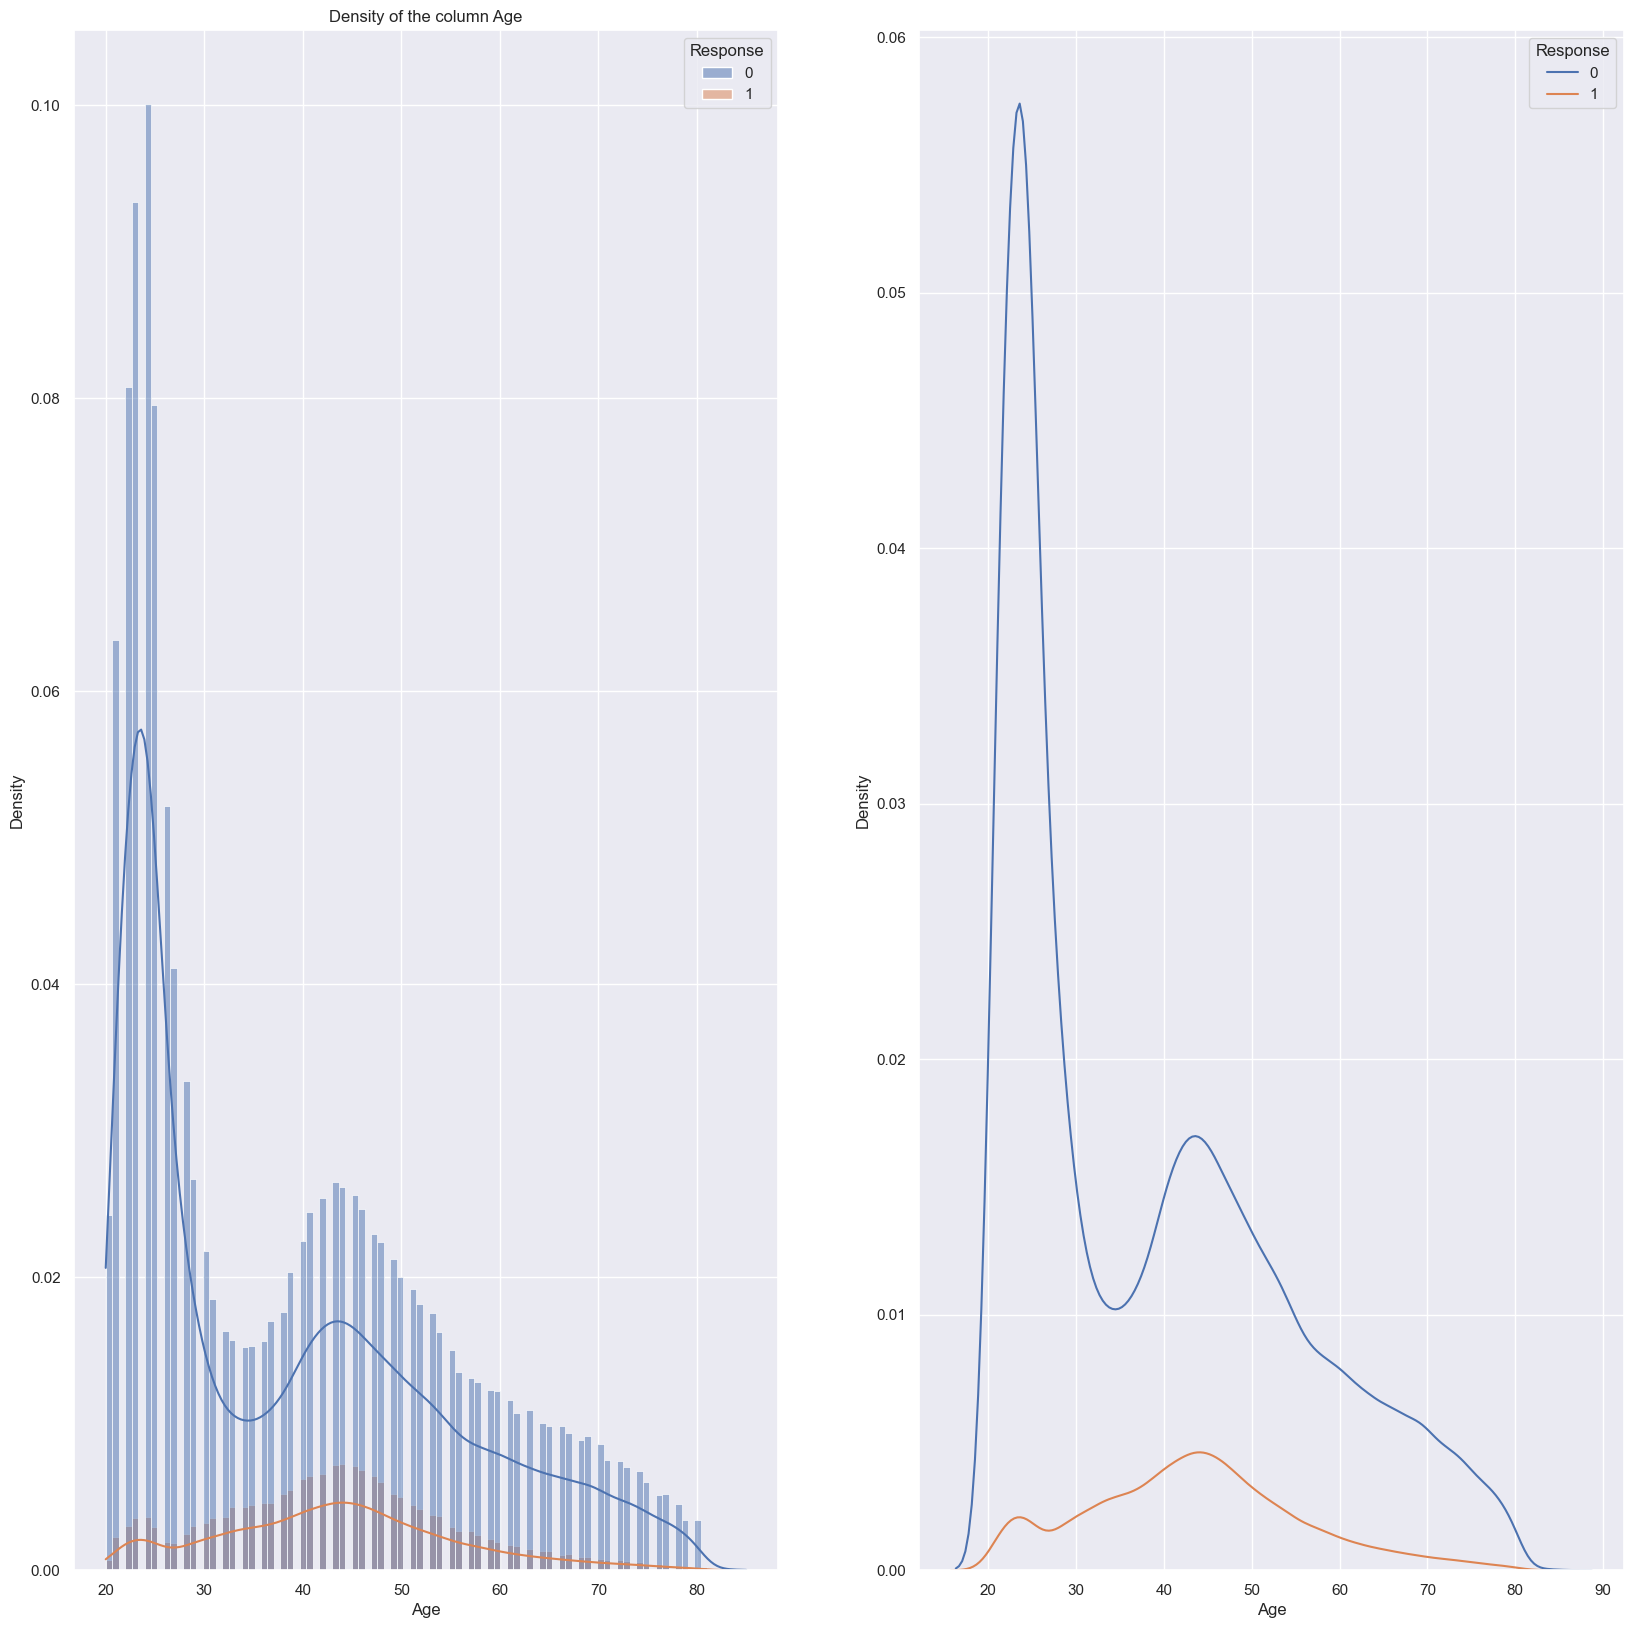

In [25]:
# plotting the probability density of the age of the people who are iterested and who are not interested
plt.rcParams['font.size'] = 14
fig,axs= plt.subplots(1,2)
sns.histplot(data= train_data, x="Age",hue="Response",kde=True,stat="density",ax=axs[0]
)
axs[0].set_title("Density of the column Age")
sns.kdeplot(data= train_data, x="Age",hue="Response",ax=axs[1])

<Axes: xlabel='Region_Code', ylabel='Density'>

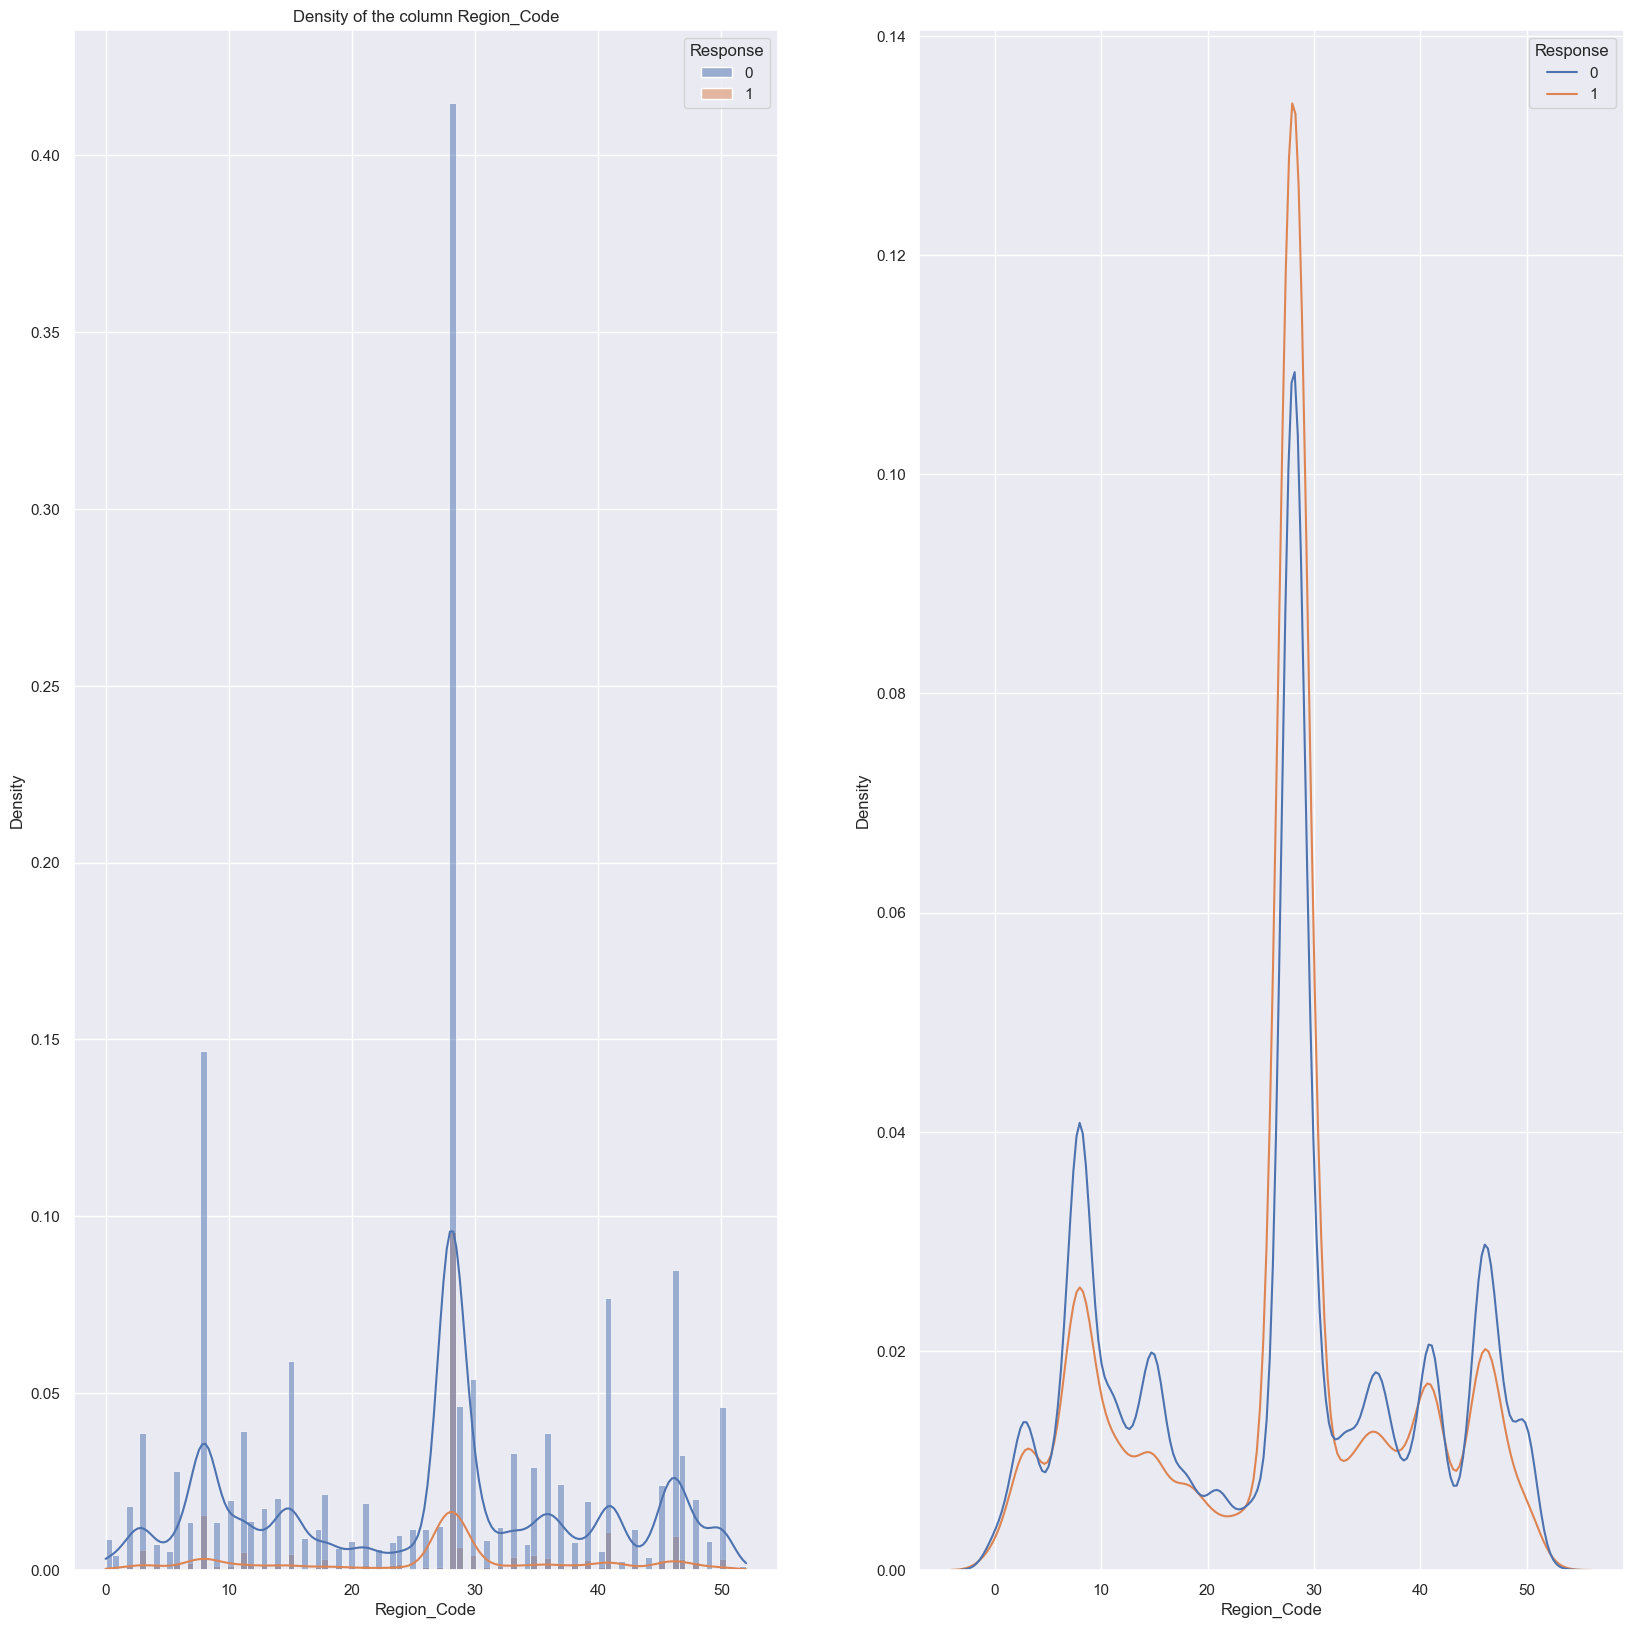

In [27]:
# Plotting the probability density of Region_code of the people who are interested and who are not interested
plt.rcParams['font.size'] = 14
fig,axs= plt.subplots(1,2)
sns.histplot(data= train_data, x="Region_Code",hue="Response",kde=True,stat="density",ax=axs[0]
)
axs[0].set_title("Density of the column Region_Code")
sns.kdeplot(data= train_data, x="Region_Code",hue="Response",common_norm=False,ax=axs[1])

<Axes: xlabel='Annual_Premium', ylabel='Density'>

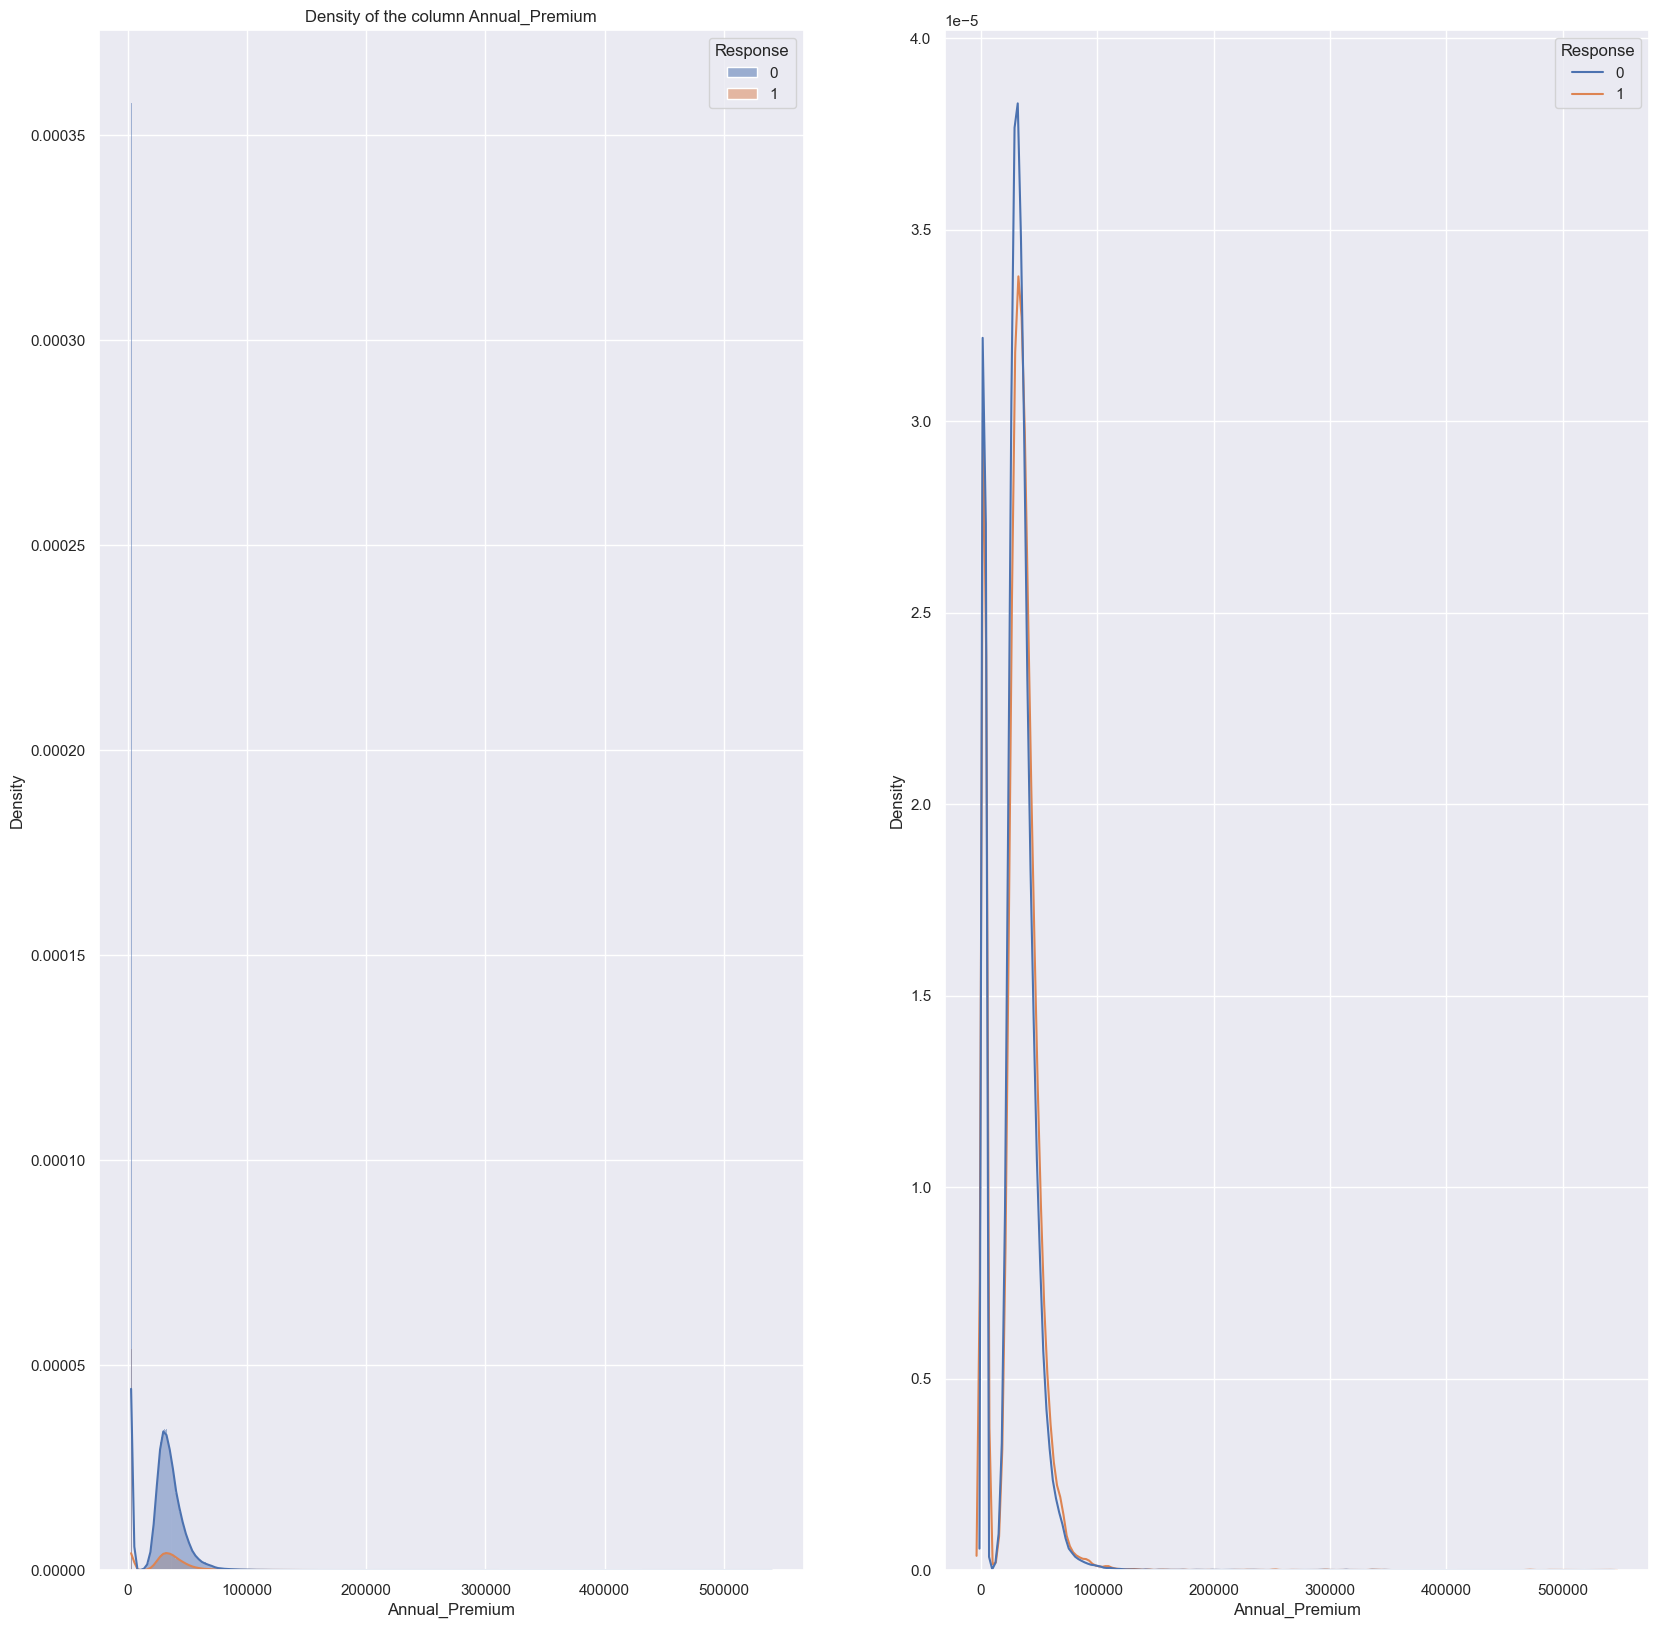

In [28]:
# Plotting the probability density of Annual_Premium
plt.rcParams['font.size'] = 14
fig,axs= plt.subplots(1,2)
sns.histplot(data= train_data, x="Annual_Premium",hue="Response",kde=True,stat="density",ax=axs[0]
)
axs[0].set_title("Density of the column Annual_Premium")
sns.kdeplot(data= train_data, x="Annual_Premium",hue="Response",common_norm=False,ax=axs[1])

<Axes: xlabel='Policy_Sales_Channel', ylabel='Density'>

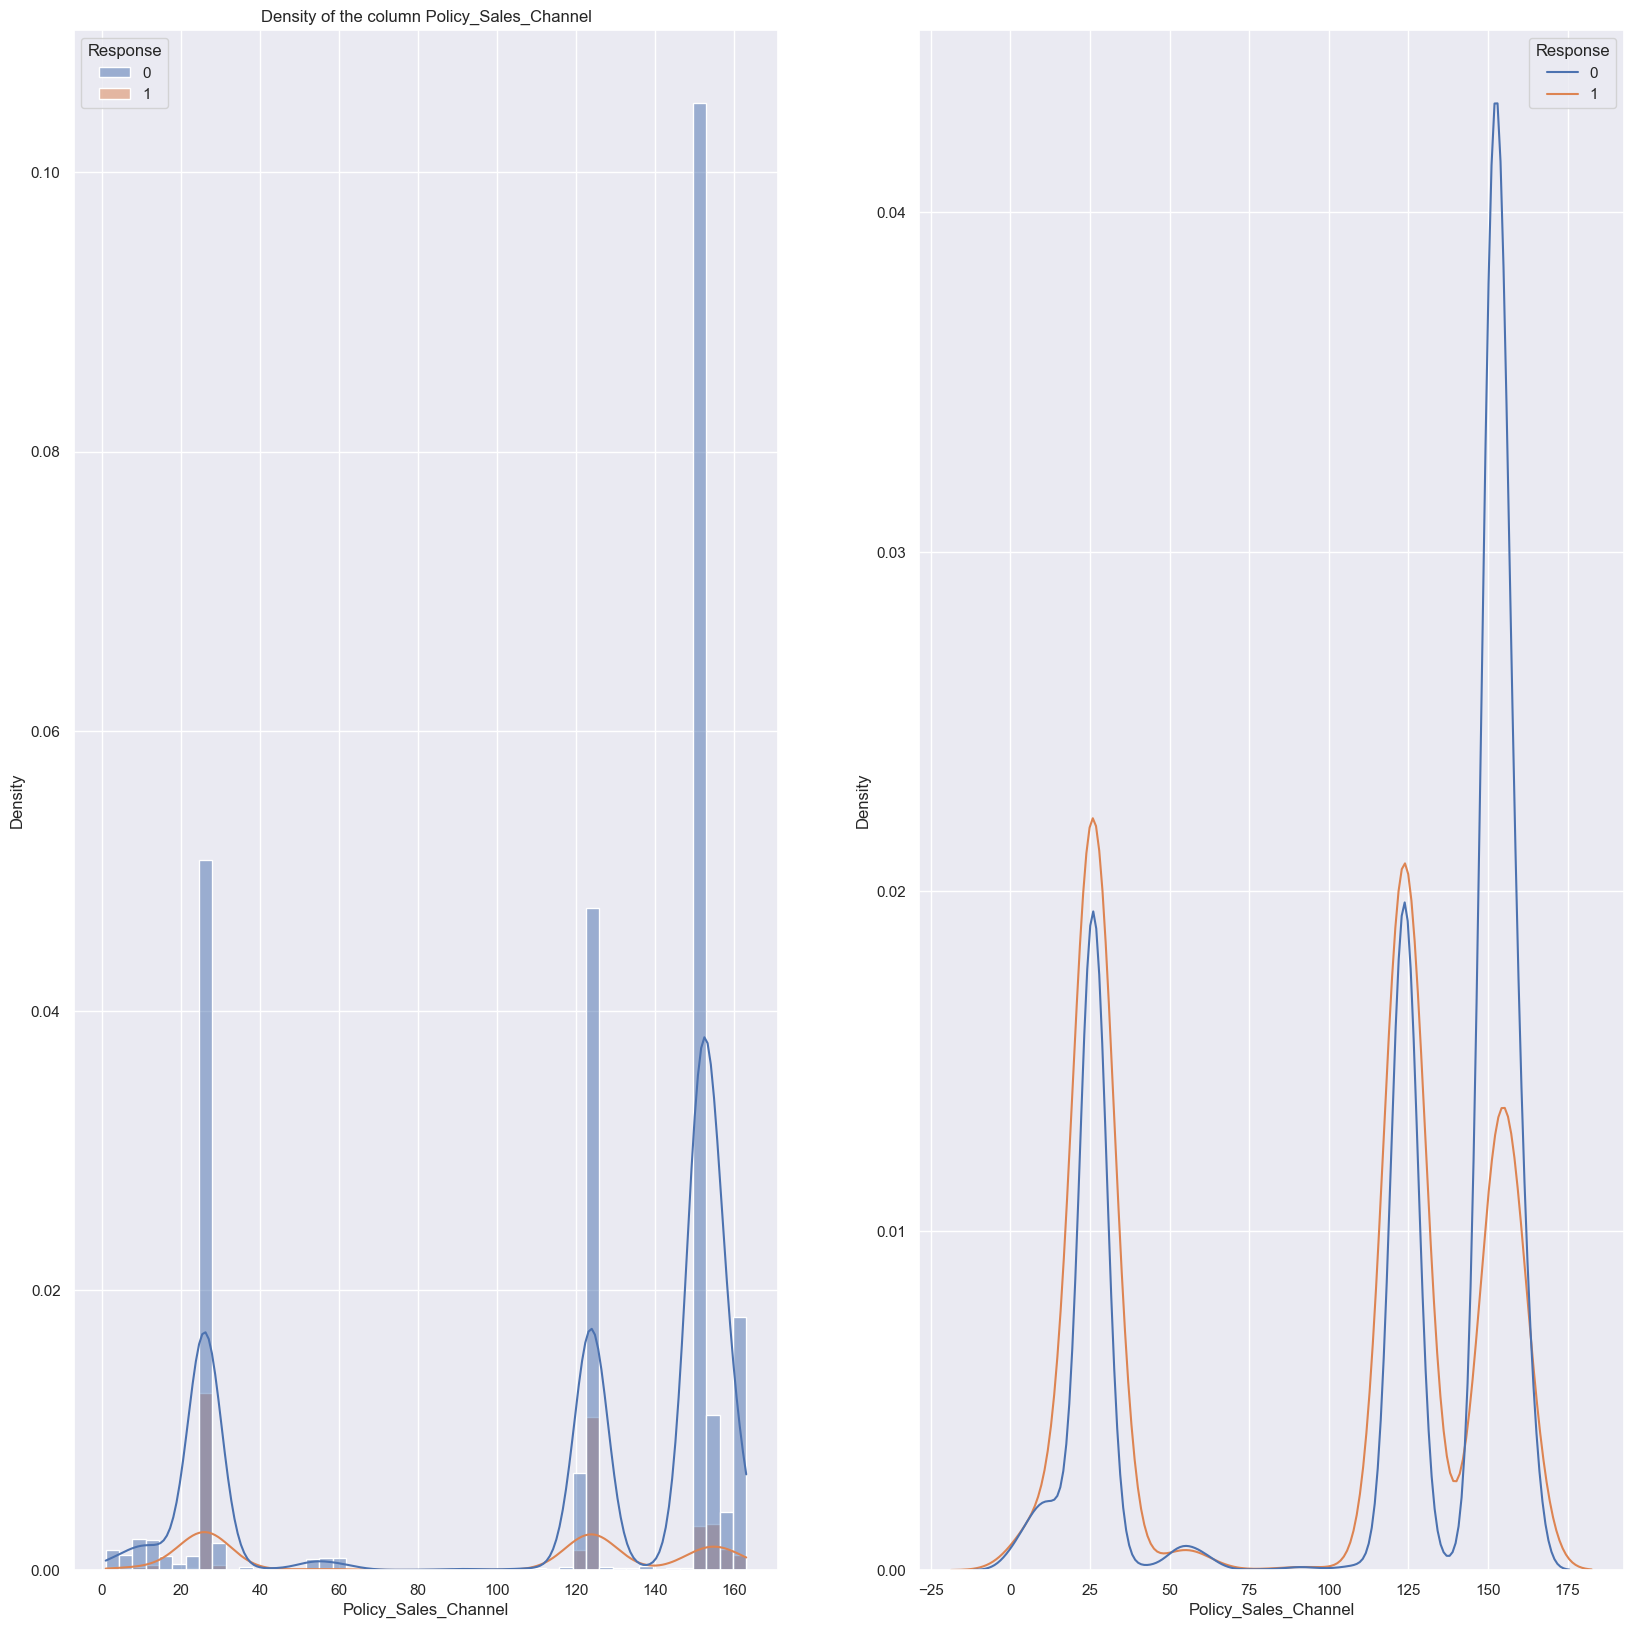

In [29]:
# Plotting the probability density  of Response
fig,axs= plt.subplots(1,2)
plt.rcParams['font.size'] = 14
sns.histplot(data= train_data, x="Policy_Sales_Channel",hue="Response",kde=True,stat="density",ax=axs[0]
)
axs[0].set_title("Density of the column Policy_Sales_Channel")
sns.kdeplot(data= train_data, x="Policy_Sales_Channel",hue="Response",common_norm=False,ax=axs[1])

<Axes: xlabel='Vintage', ylabel='Density'>

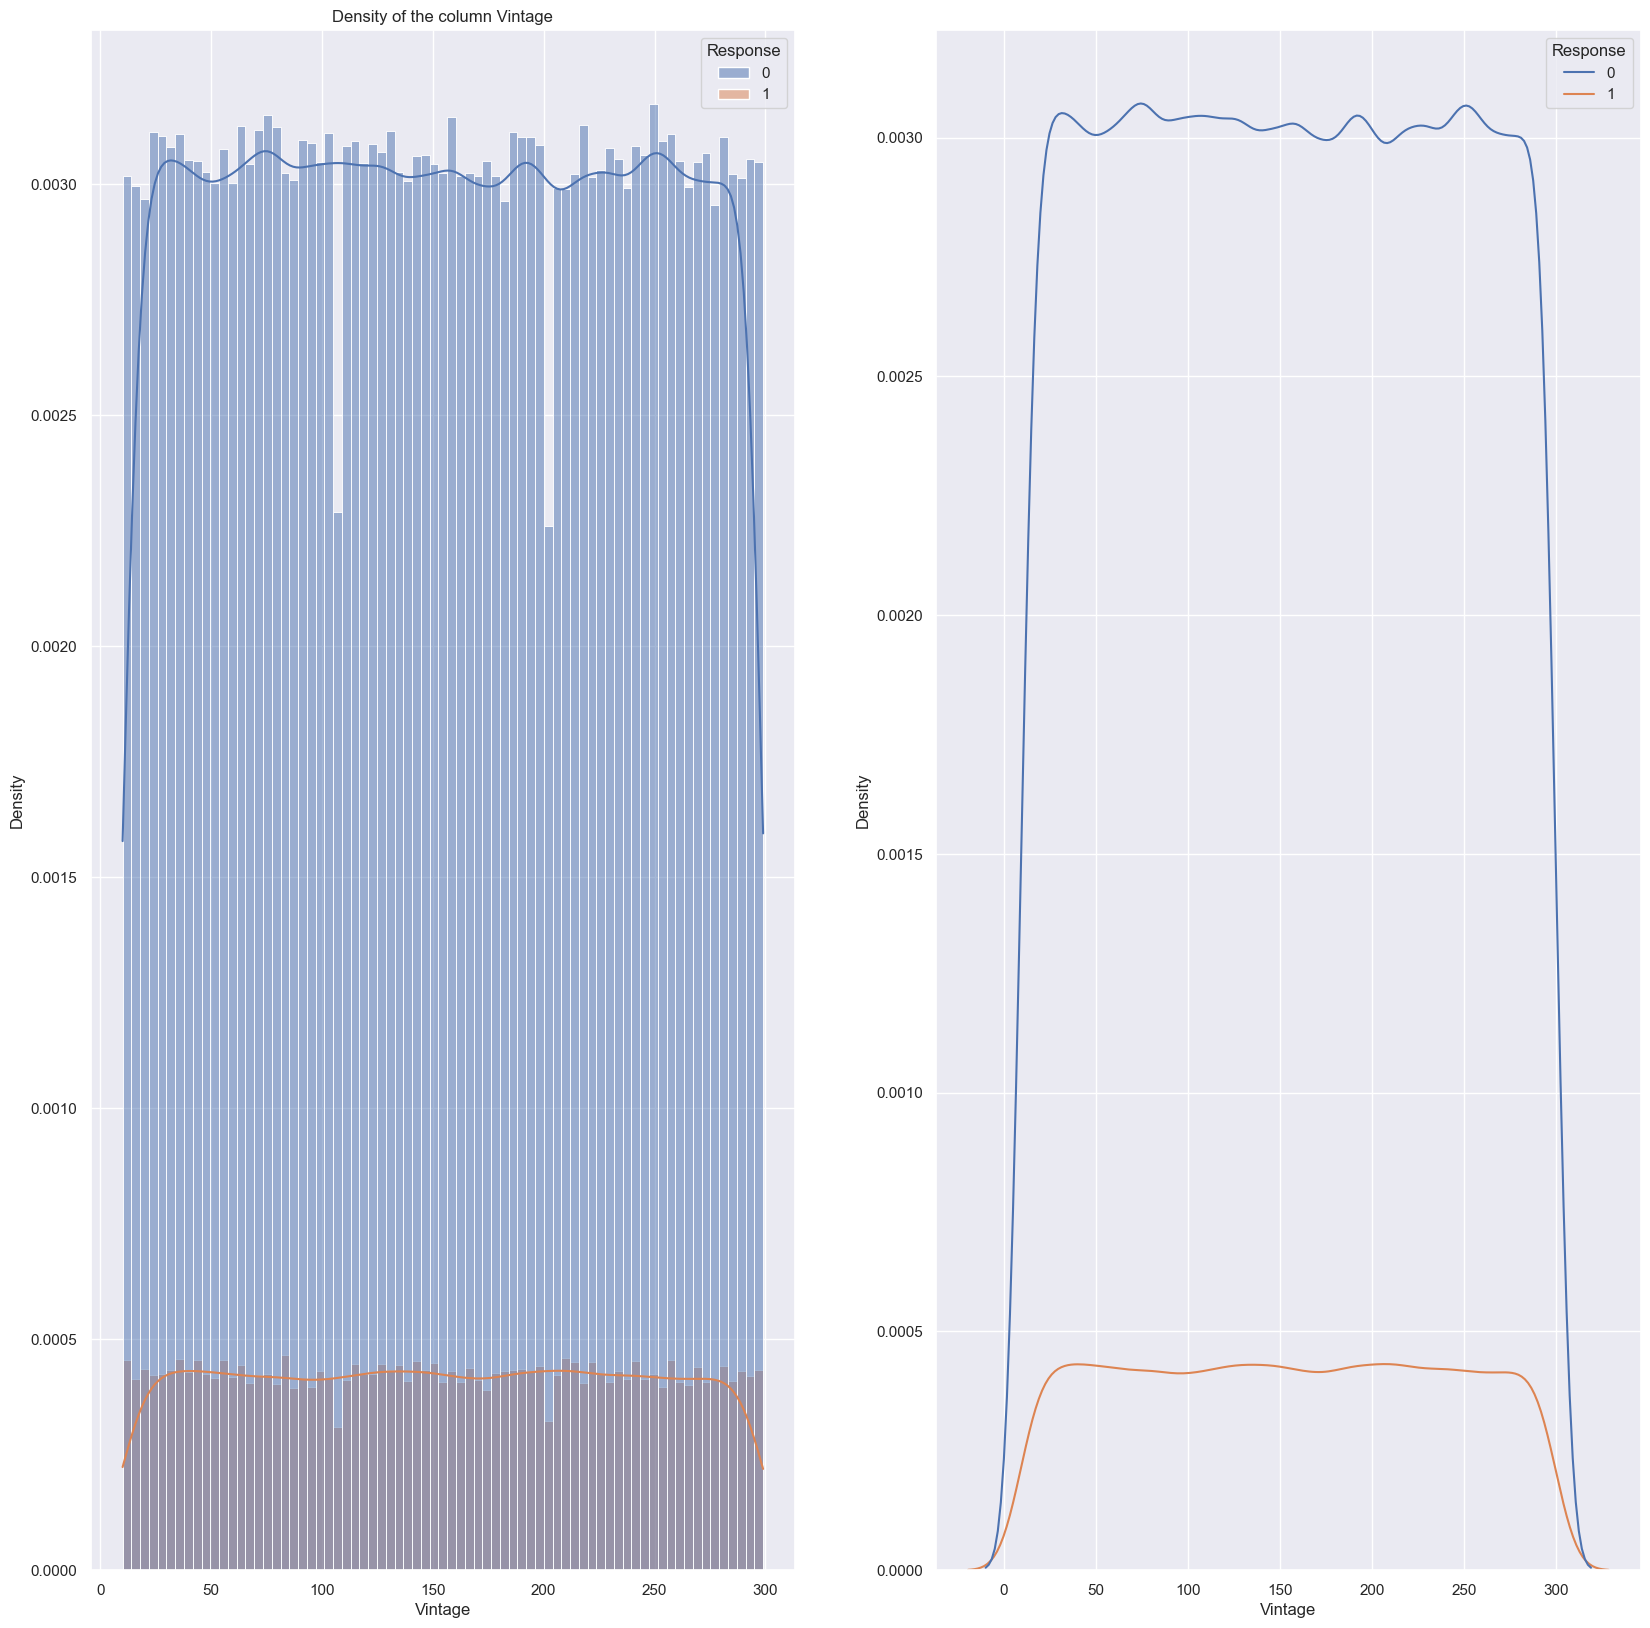

In [30]:
# Plotting the probability density of Vintage
fig,axs= plt.subplots(1,2)
plt.rcParams['font.size'] = 14
sns.histplot(data= train_data, x="Vintage",hue="Response",kde=True,stat="density",ax=axs[0]
)
axs[0].set_title("Density of the column Vintage")
sns.kdeplot(data= train_data, x="Vintage",hue="Response",ax=axs[1])

In [115]:
# class_a_data = train_data[train_data['Response'] == 0]
# class_b_data = train_data[train_data['Response'] == 1]

# # Create a scatter plot
# plt.figure(figsize=(8, 6))

# # Scatter plot for ClassA
# plt.scatter(class_a_data.index, class_a_data['Response'], color='blue', label='Class 0')

# # Scatter plot for ClassB
# plt.scatter(class_b_data.index, class_b_data['Response'], color='red', label='Class 1')

# plt.xlabel('Data Points')
# plt.ylabel('Values')
# plt.title('Scatter Plot of Response =0 and Response=1')
# plt.legend()

# # Show the plot
# plt.show()
# # plt.scatter(np.arange(0,len(train_data['Response'])),train_data['Response'])

# Data Preprocessing

In [31]:
# All attributes have 2 or more than 2 unique values.
train_data.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [32]:
type(train_data)

pandas.core.frame.DataFrame

Removing the column 'id' from the dataframe

In [33]:
# Removing the attribute 'ID' from the dataframe
train_data.drop('id',axis=1, inplace=True)
train_data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [34]:
# Listing out unique elements in the column 'Gender' 
train_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [35]:
# Listing out unique elements in the column 'Driving_License' 
train_data['Driving_License'].unique()

array([1, 0], dtype=int64)

In [36]:
# Listing out unique elements in the column 'Vehicle_Age' 
train_data['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [37]:
# Listing out unique elements in the column 'Vehicle_Damage' 
train_data['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

In [38]:
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()


In [39]:
!pip install scikit-learn

In [40]:
# Converting the caterogical values of 'Gender' attribute to Numerical values
train_data['Gender']= label_encoder.fit_transform(train_data['Gender'])

In [41]:
train_data['Gender'].head()

0    1
1    1
2    1
3    1
4    0
Name: Gender, dtype: int32

In [42]:
# Converting the categorical values of 'Vehicle_Age' attribute to Numerical values
train_data['Vehicle_Age']= label_encoder.fit_transform(train_data['Vehicle_Age'])
train_data['Vehicle_Age'].unique()

array([2, 0, 1])

In [43]:
# Coverting the categorical values of 'Vehicle_Damage' attribute to Numerical Values
train_data['Vehicle_Damage']= label_encoder.fit_transform(train_data['Vehicle_Damage'])


In [44]:
train_data['Vehicle_Damage'].unique()

array([1, 0])

In [45]:
train_data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [46]:
train_data.dtypes

Gender                    int32
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int32
Vehicle_Damage            int32
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

# Checking if the Classes of 'Response' are balanced are not

In [47]:
type(train_data['Response'])

pandas.core.series.Series

Response
0    334399
1     46710
Name: count, dtype: int64

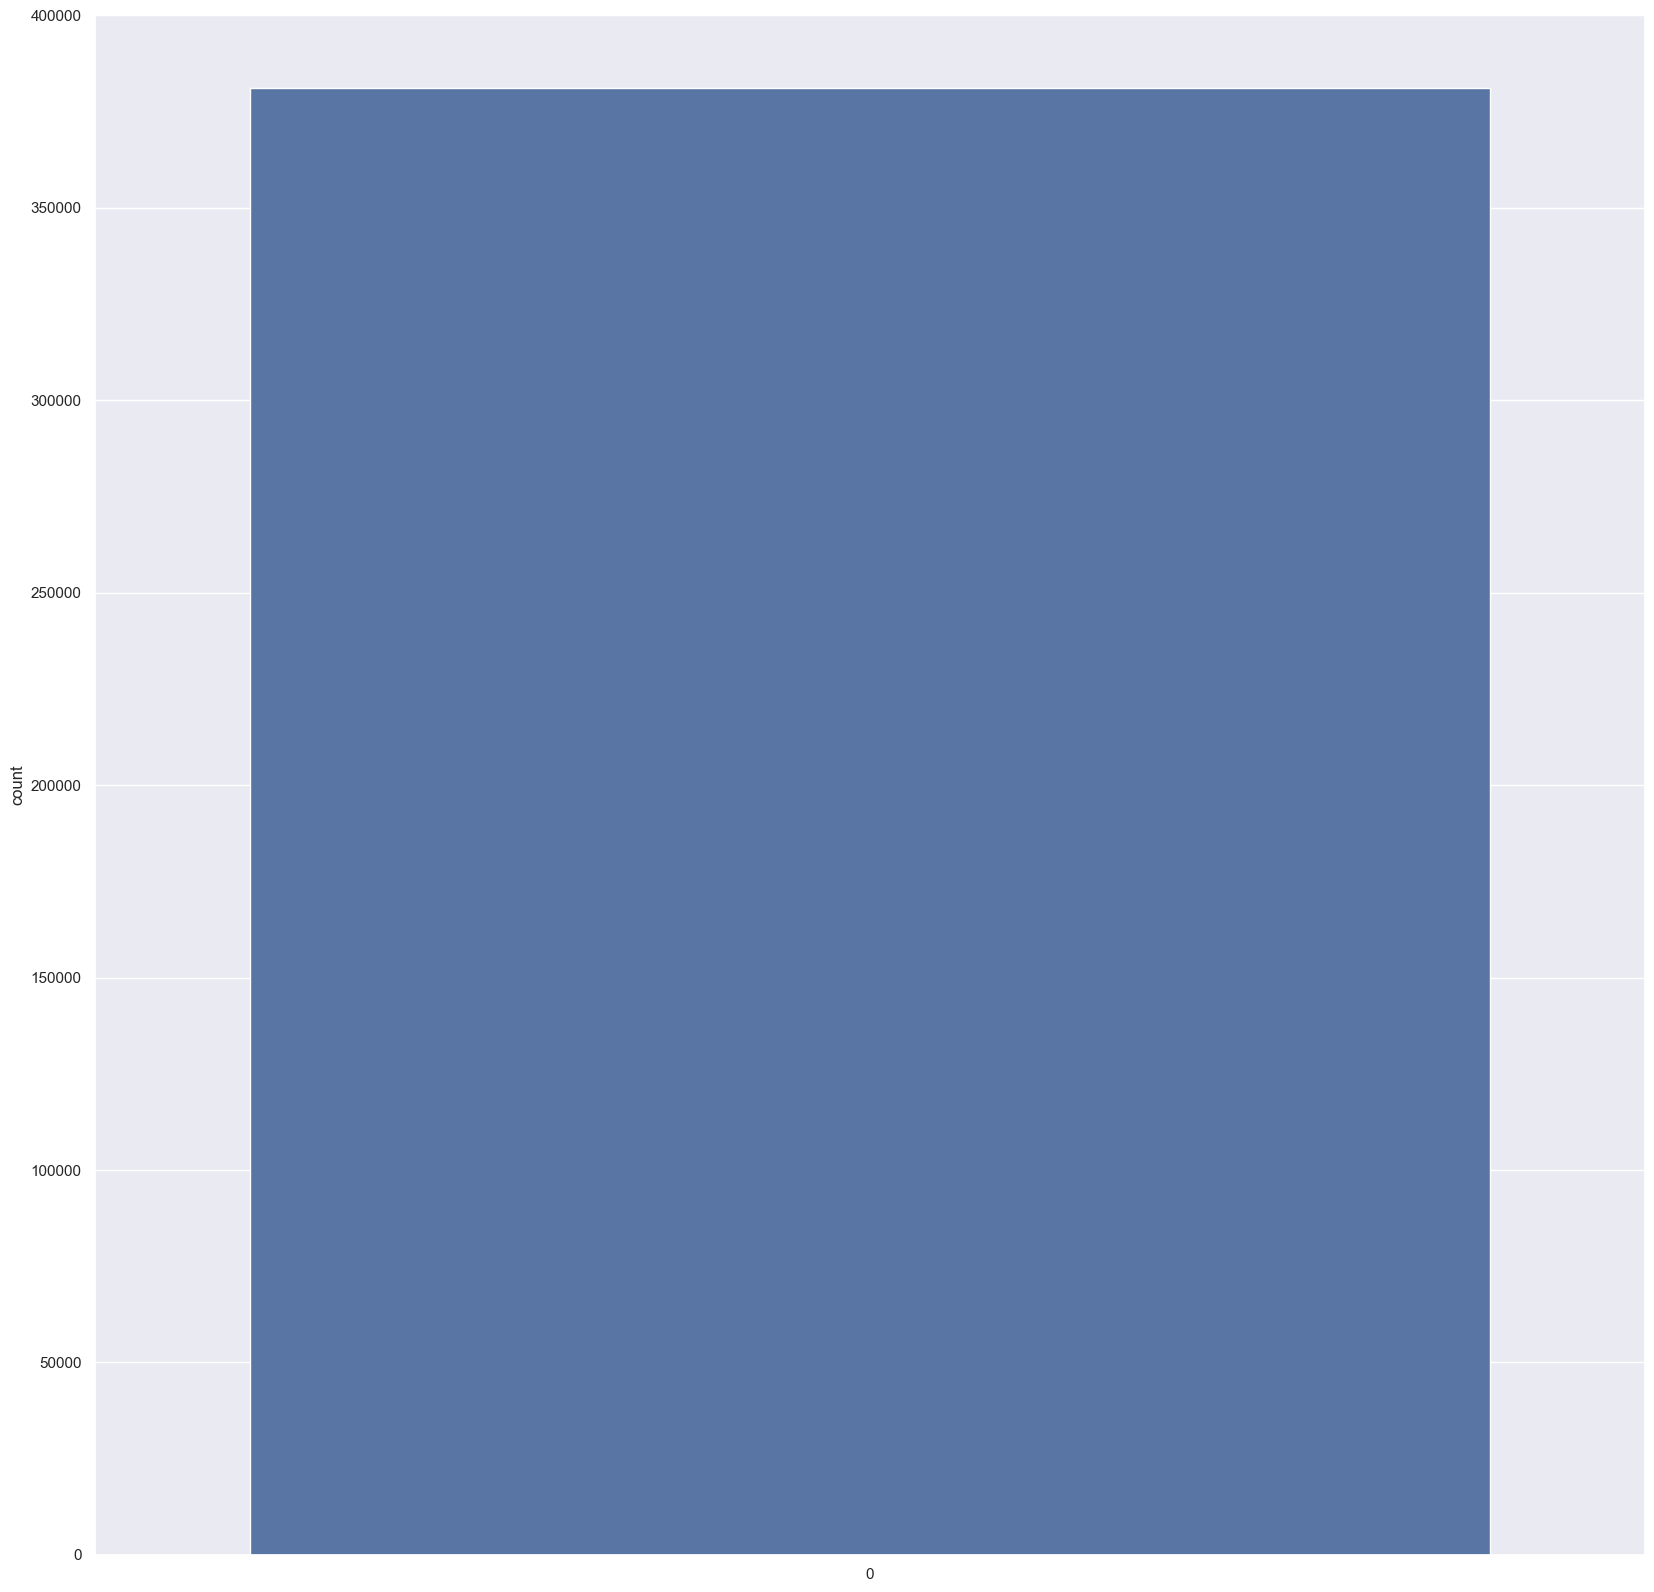

In [48]:
plt.rcParams['figure.figsize']= [20,20]
sns.countplot(train_data['Response'])
train_data['Response'].value_counts()

In [49]:
print('The classes of Response Attribute are imbalanced.')

The classes of Response Attribute are imbalanced.


 The classes of Response Attribute are imbalanced.

In [50]:
# resampling the class which has lesser number of values so as to balance both the classes
from sklearn.utils import resample
df_majority= train_data[(train_data['Response']==0)]
df_minority= train_data[(train_data['Response']==1)]
df_minority_upsampled= resample(df_minority, replace= True,n_samples= 334399,random_state=0)

df_upsampl= pd.concat([df_minority_upsampled, df_majority])

In [51]:
# Both the classes are balanced
df_upsampl['Response'].value_counts()

Response
1    334399
0    334399
Name: count, dtype: int64

# Checking Outliers

In [52]:
np.median(df_upsampl["Age"])

41.0

<Axes: xlabel='Age'>

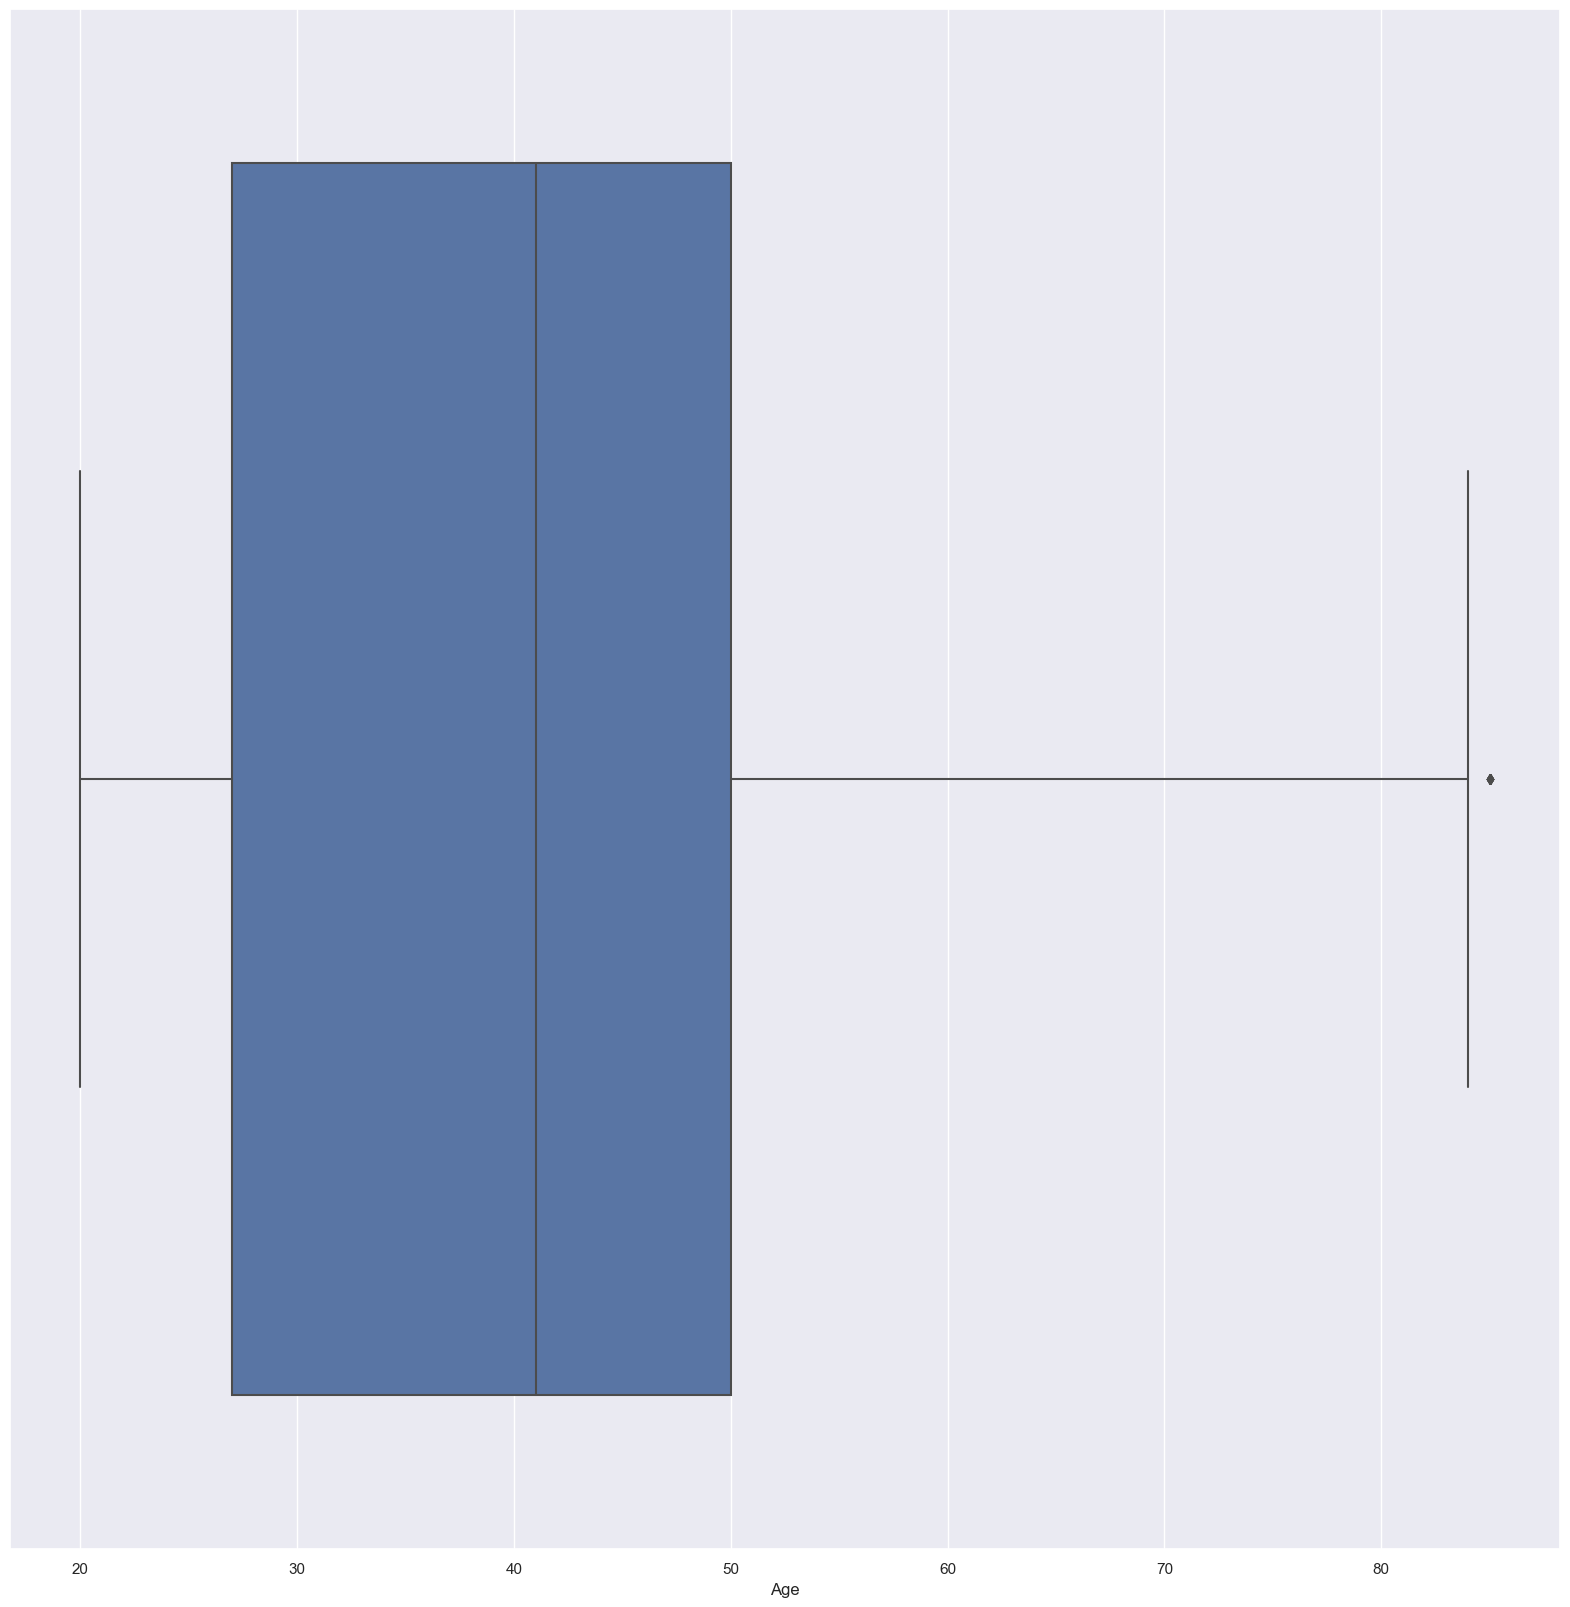

In [53]:
# Box plot of the attribute 'Age'
plt.rcParams['figure.figsize']= [20,20]
sns.boxplot(x=df_upsampl["Age"])

<Axes: xlabel='Annual_Premium'>

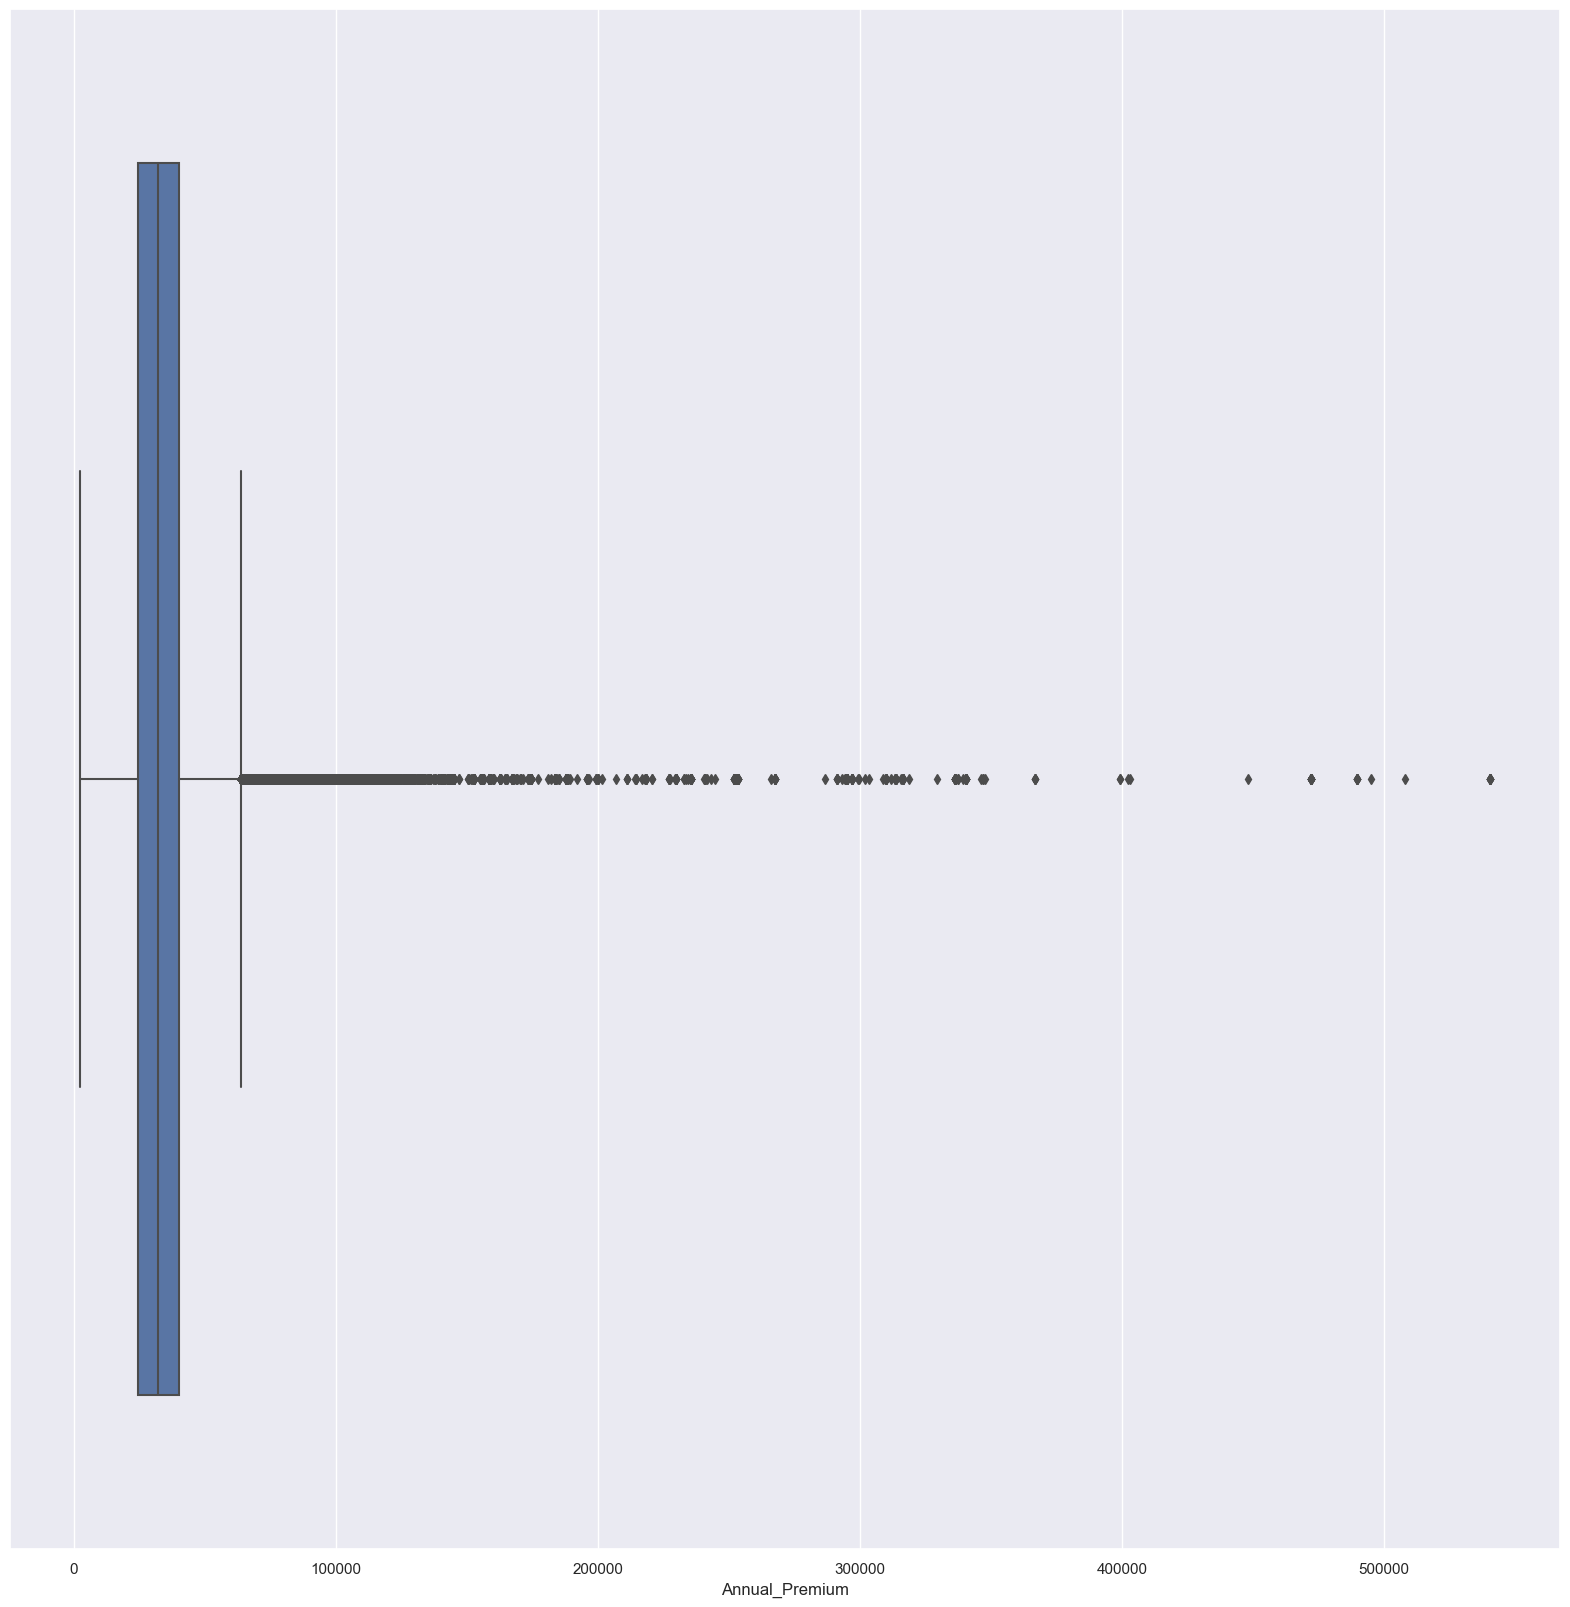

In [54]:
# Box plot of the attribute 'Annual_Premium'
plt.rcParams['figure.figsize']= [20,20]
sns.boxplot(x=df_upsampl["Annual_Premium"])

There are a good number of outliers in the above boxplot for the attribute 'Annual Premium'

<Axes: xlabel='Policy_Sales_Channel'>

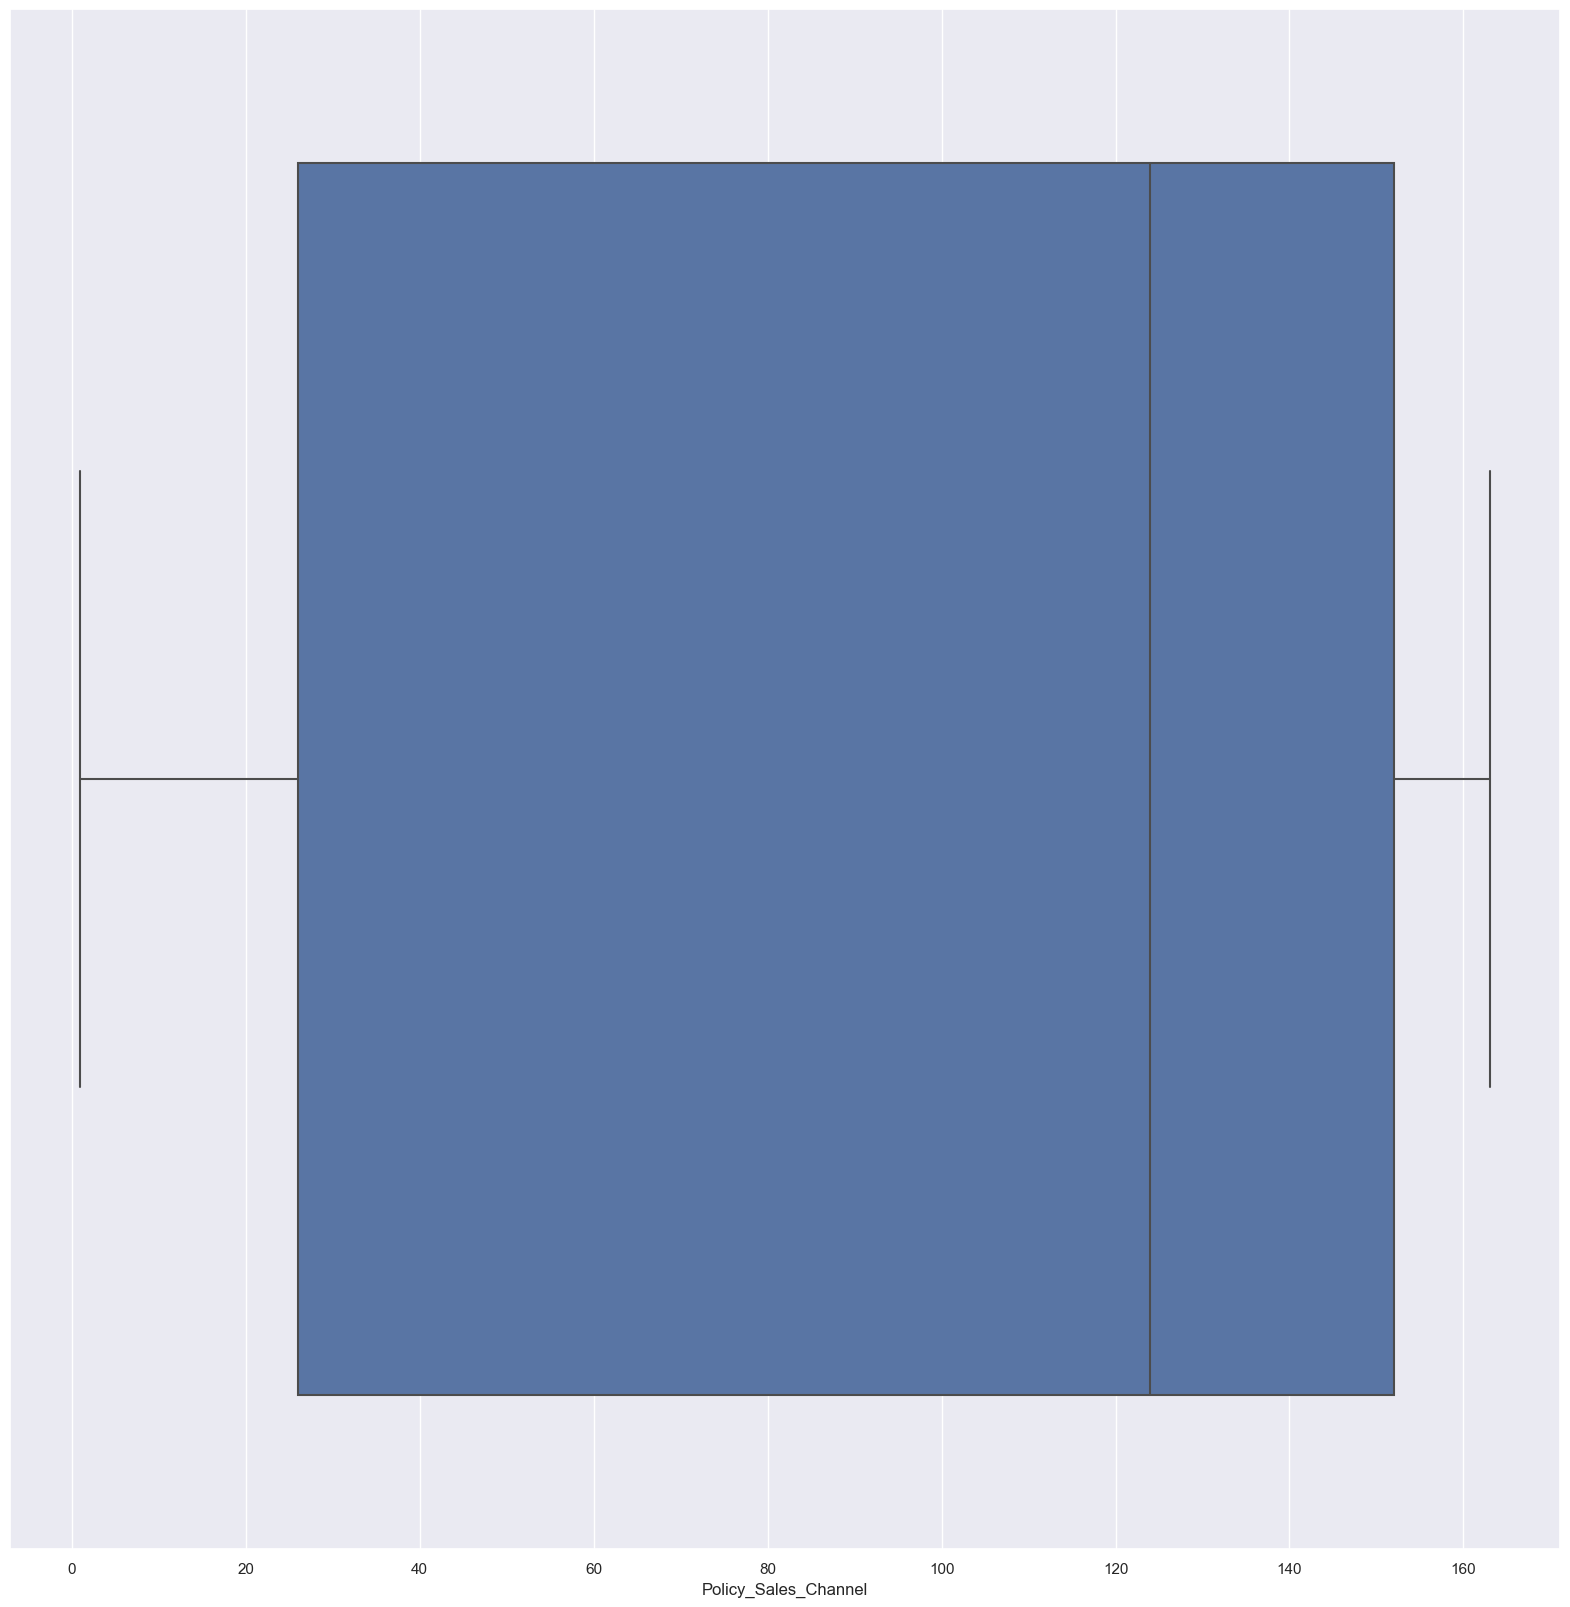

In [55]:
# Box plot of the attribute 'Policy Sales Channel'
plt.rcParams['figure.figsize']= [20,20]
sns.boxplot(x=df_upsampl["Policy_Sales_Channel"])

<Axes: xlabel='Vintage'>

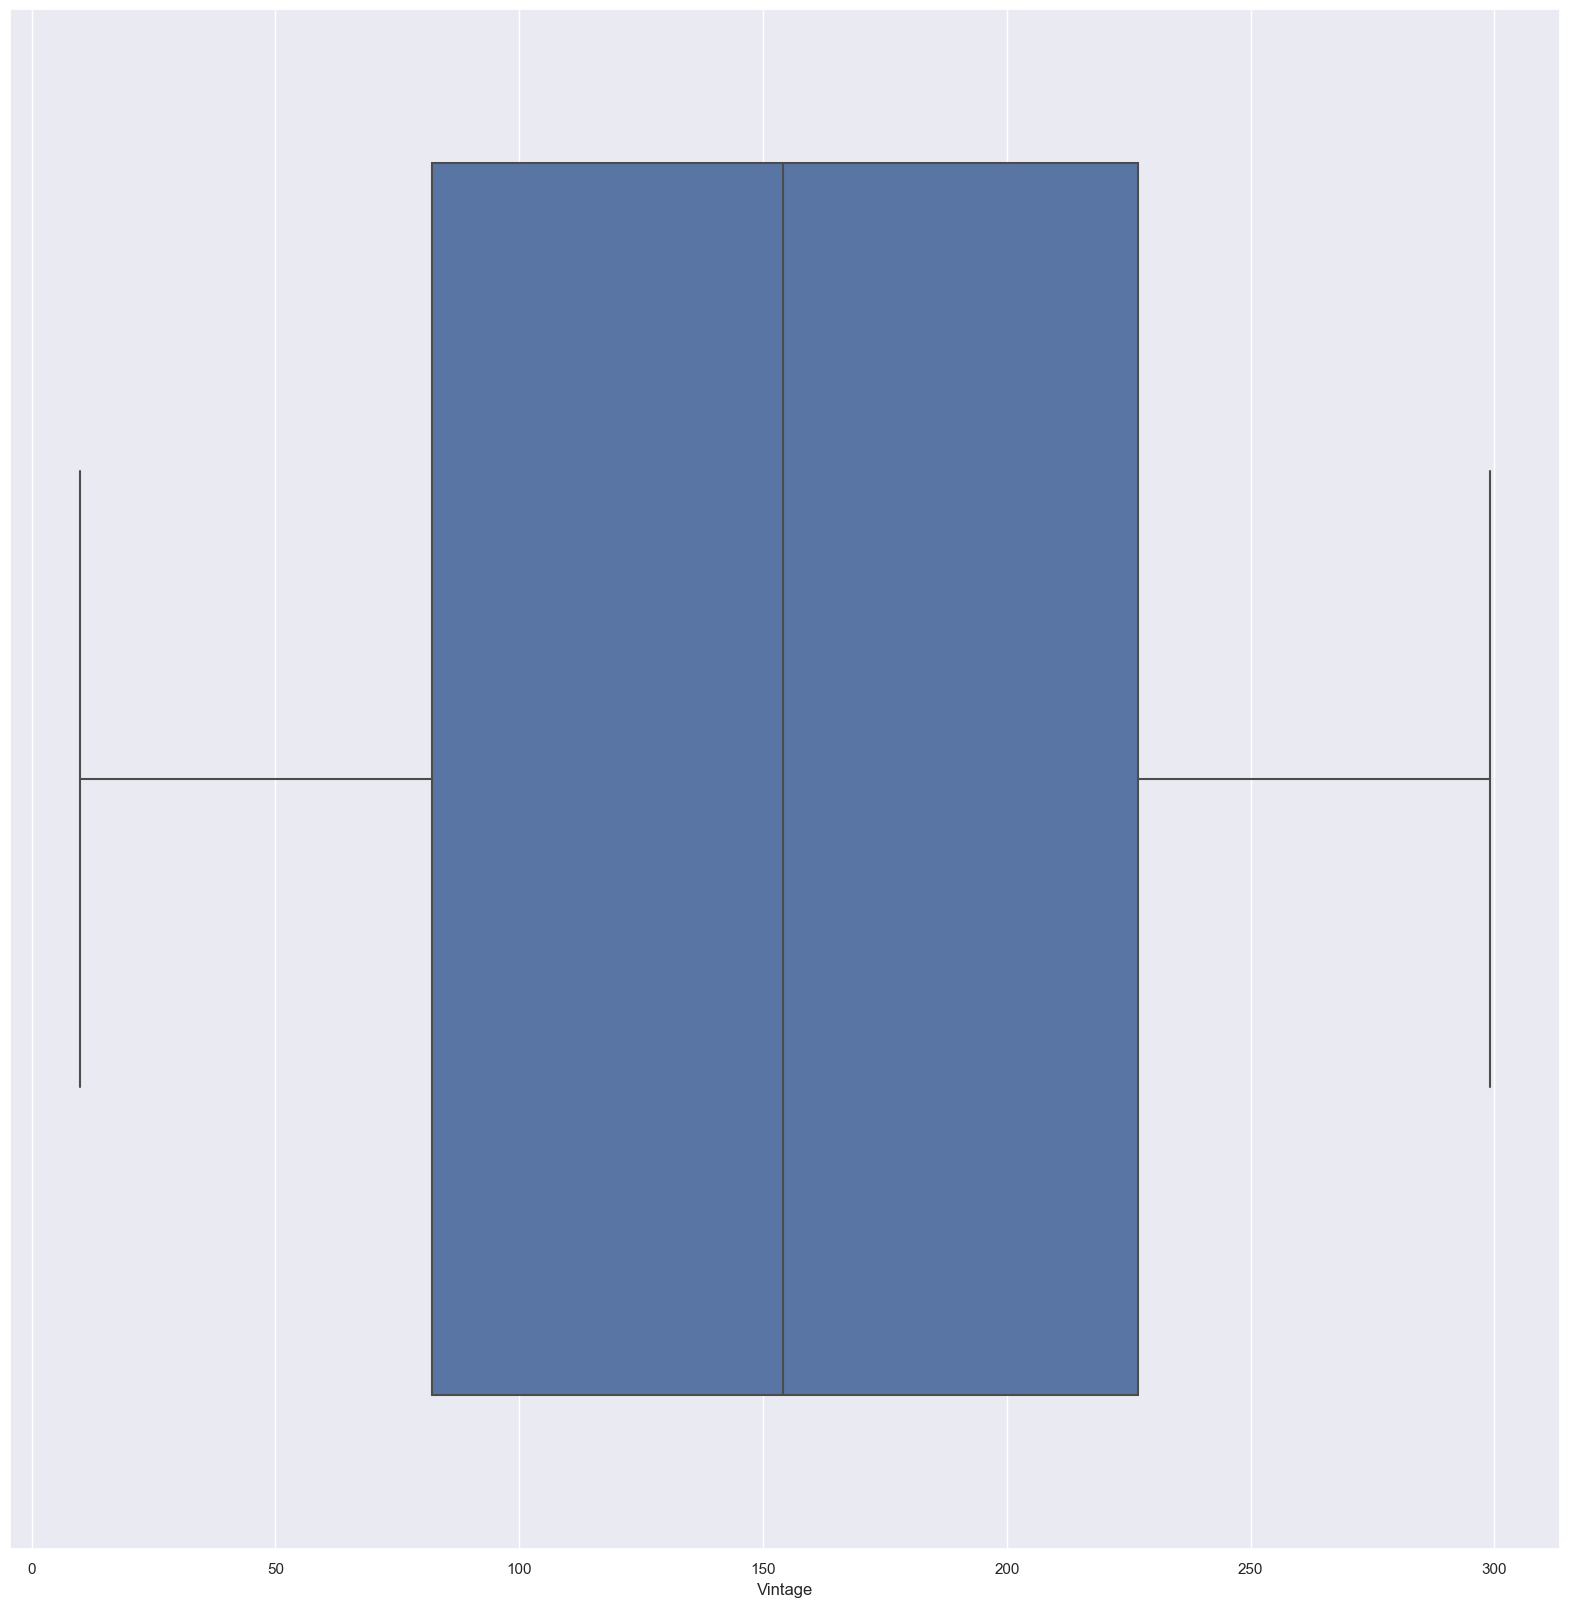

In [56]:
# Box plot of the attribute 'Vintage'
plt.rcParams['figure.figsize']= [20,20]
sns.boxplot(x=df_upsampl["Vintage"])

In [57]:
import scipy.stats as stats
# z= np.abs(stats.zscore(df_upsampl))
# data_clean= df_upsampl

In [58]:
z= np.abs(stats.zscore(df_upsampl))

In [59]:
# data_clean : taining data after removing the outliers
data_clean= df_upsampl[(z<1.7).all(axis=1)]
data_clean.shape

(512959, 11)

Text(0.5, 1.0, "Box plot of the attribute 'Annual Premium' after outliers are removed")

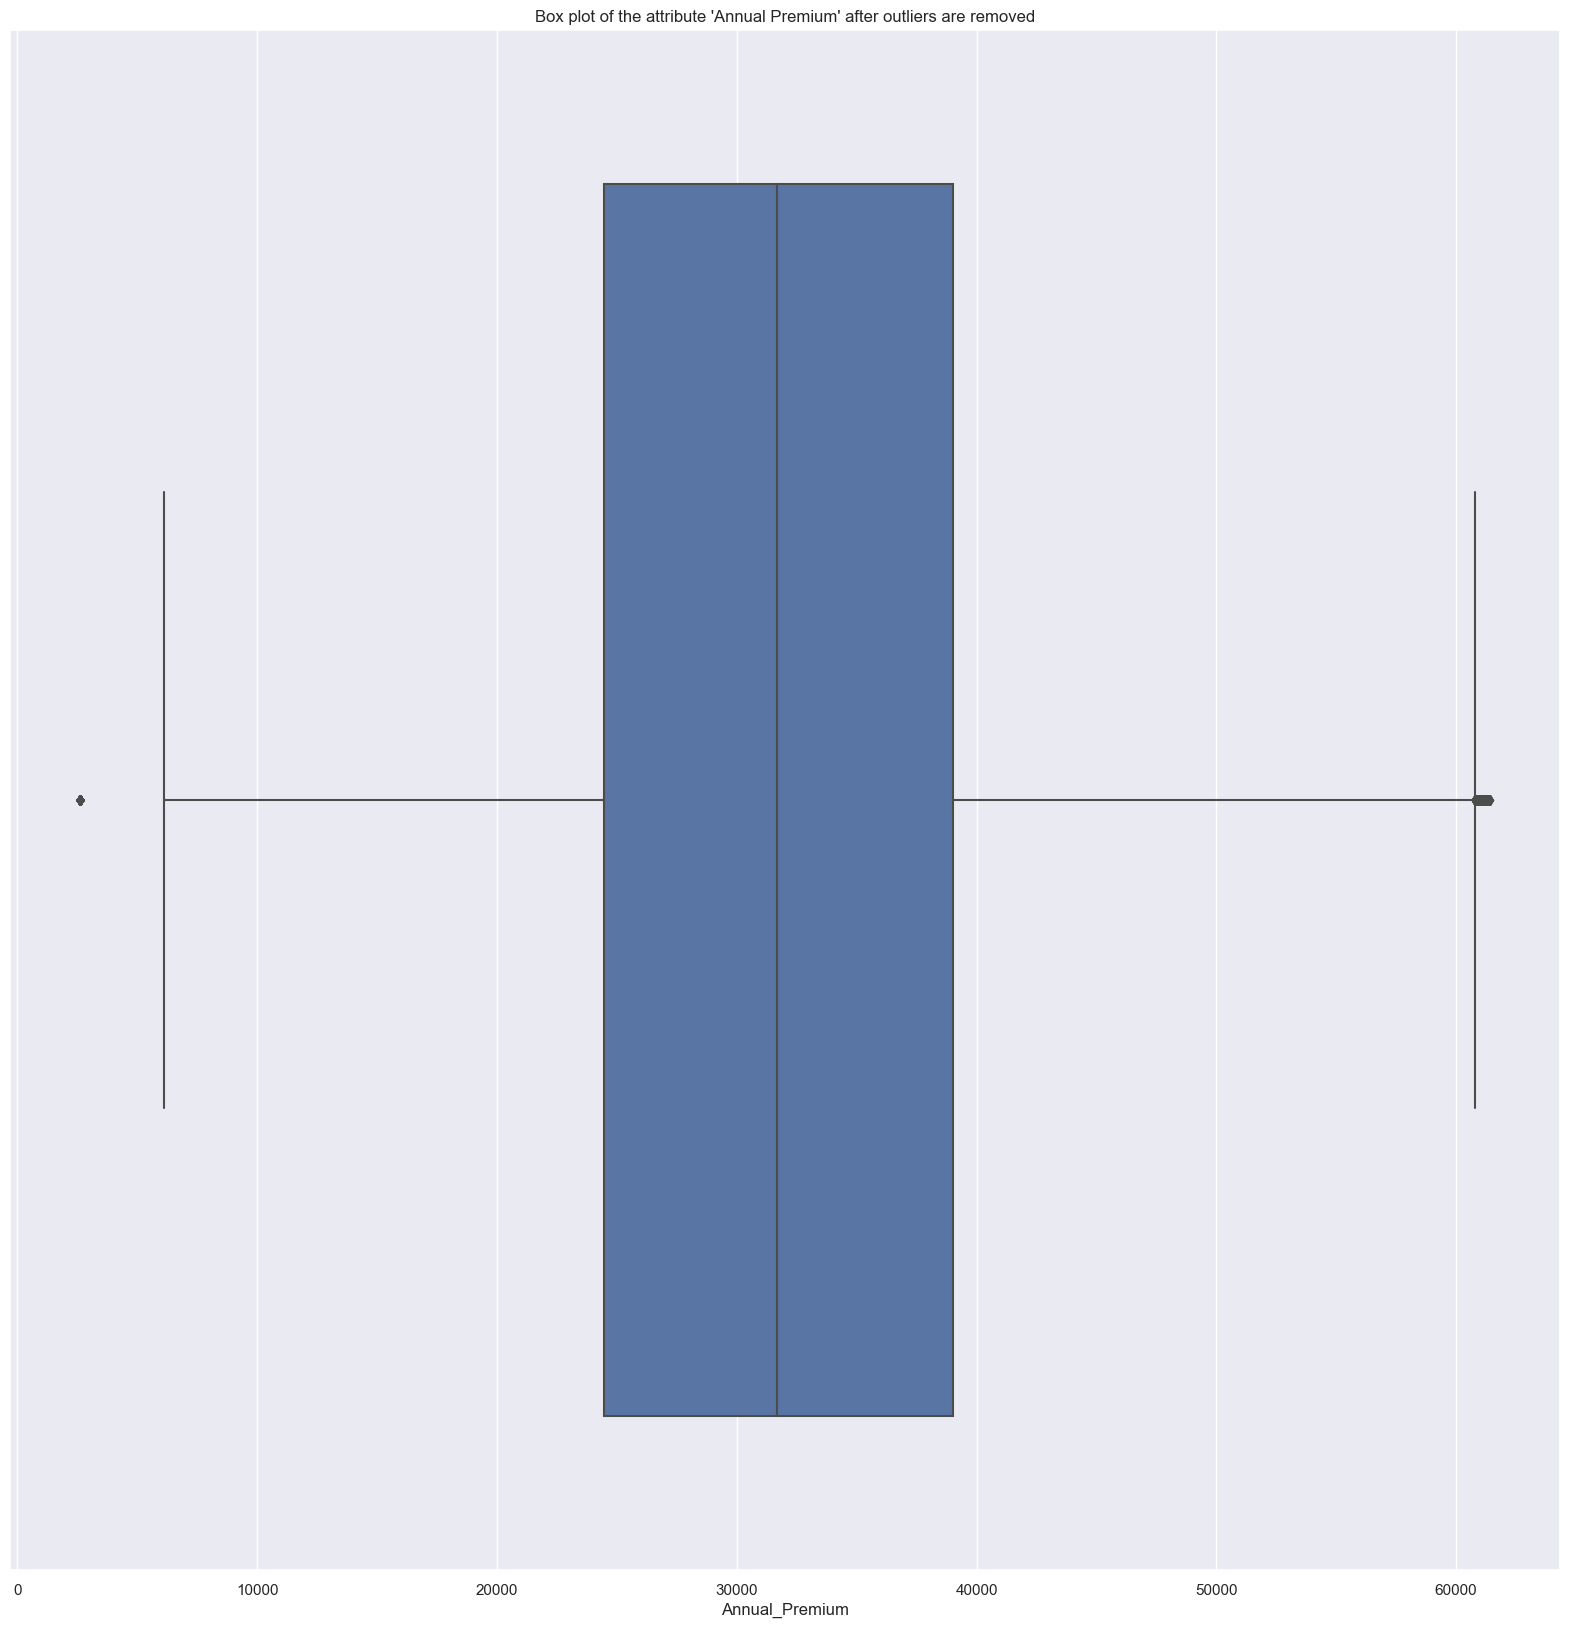

In [117]:
plt.rcParams['figure.figsize']= [20,20]
sns.boxplot(x=data_clean["Annual_Premium"])
plt.title("Box plot of the attribute 'Annual Premium' after outliers are removed")

<Axes: >

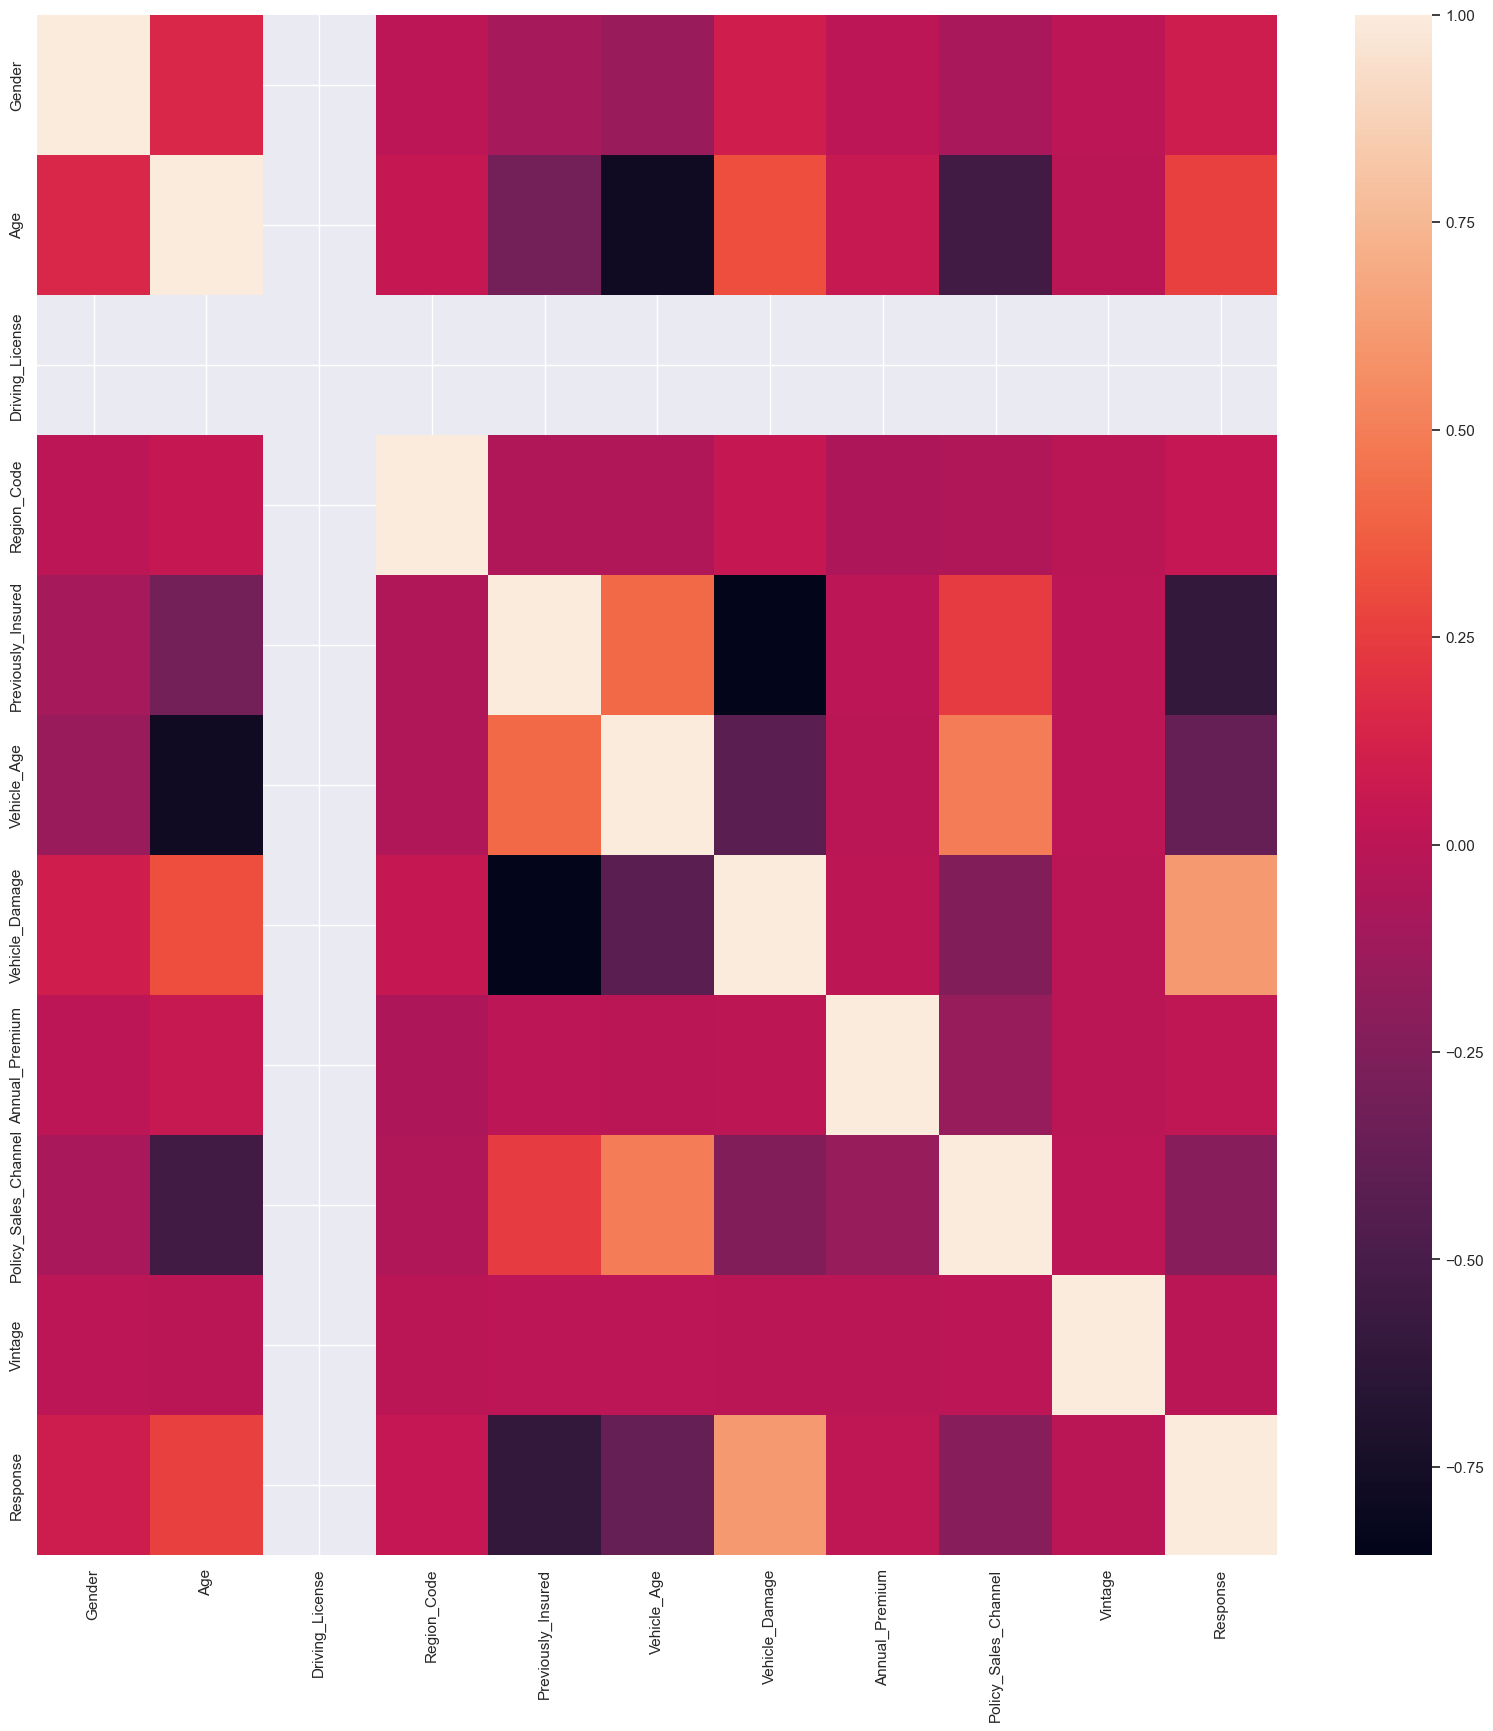

In [61]:
# Correlation Heat map of all the features
sns.heatmap(data_clean.corr(),fmt='.2g')
plt.title("Correlation Heat Map")

In [62]:
data_clean.drop('Driving_License',axis=1,inplace= True)

C:\Users\DHANUSH PITTALA\AppData\Local\Temp\ipykernel_30264\795160197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.drop('Driving_License',axis=1,inplace= True)


In [63]:
data_clean.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
22008,1,43,13.0,0,0,1,26950.0,26.0,266,1
354307,0,60,24.0,0,0,1,2630.0,124.0,286,1
346468,0,23,28.0,0,1,1,44214.0,152.0,258,1
172967,1,38,28.0,0,0,1,34115.0,26.0,45,1
247697,1,44,29.0,0,0,1,34032.0,26.0,273,1


# Model

In [64]:
X = data_clean.drop('Response',axis=1)
y = data_clean['Response']

In [65]:
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.05, random_state=0)

In [ ]:
#  X_test, y_test are used for validation here. 'test_data' data is used for testing the model

# Decision Tree Classifier

In [105]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=60, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=60, random_state=0)

In [106]:
dtree.get_depth()

60

In [107]:
dtree.get_n_leaves()

41353

In [108]:
dtree.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 60,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [109]:
y_pred= dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy Score : 95.1 %


In [110]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test,y_pred)))
print('Precision Score : ',(precision_score(y_test,y_pred)))
print('Recall Score : ',( recall_score(y_test,y_pred)))

F-1 Score :  0.9530426986439539
Precision Score :  0.9109476540741269
Recall Score :  0.9992166692777691


In [111]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

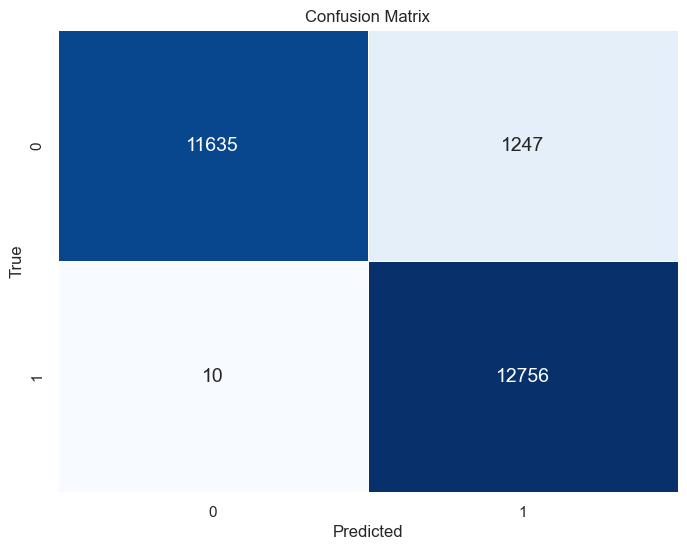

In [112]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Random Forest Classifier

In [113]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [118]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [74]:
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_samples': [50,100,150,200]
# }

In [75]:
# grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, n_jobs=4, verbose=2)
# grid_search.fit(X_train, y_train)

In [119]:
y_pred= rfc.predict(X_test)
print("Accuracy Score :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy Score : 95.93 %


In [120]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test,y_pred)))
print('Precision Score : ',(precision_score(y_test,y_pred)))
print('Recall Score : ',( recall_score(y_test,y_pred)))

F-1 Score :  0.9607141511921353
Precision Score :  0.9252702604657912
Recall Score :  0.9989816700610998


In [121]:
cm = confusion_matrix(y_test, y_pred)

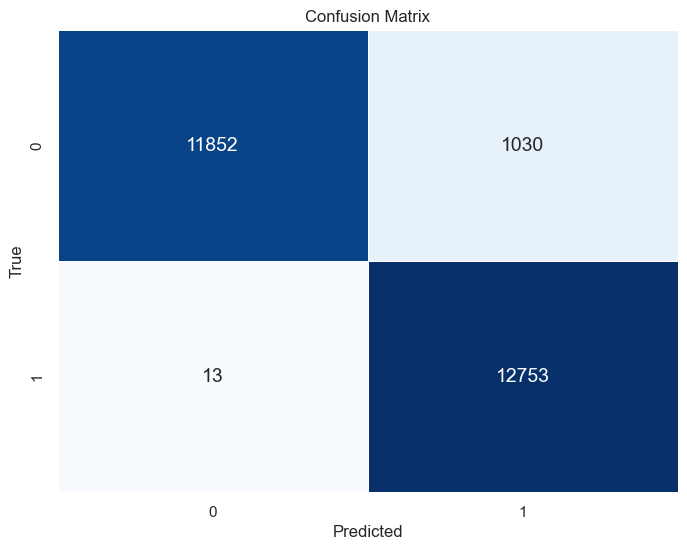

In [122]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression(random_state=0)
lr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [124]:
y_pred= lr.predict(X_test)
print("Accuracy score :",round(accuracy_score(y_test,y_pred)*100,2),"%")

Accuracy score : 79.74 %


In [125]:
print('F-1 Score : ',(f1_score(y_test,y_pred)))
print('Precision Score : ',(precision_score(y_test,y_pred)))
print('Recall Score : ',( recall_score(y_test,y_pred)))

F-1 Score :  0.8271756842140269
Precision Score :  0.718694019069633
Recall Score :  0.9742284192386025


In [126]:
cm = confusion_matrix(y_test, y_pred)

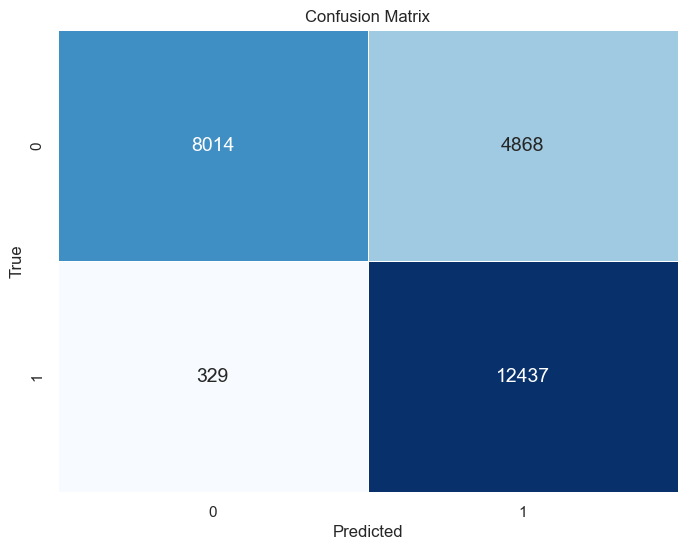

In [127]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Implement the model to predict test dataset

In [89]:
test_data['Gender']= label_encoder.fit_transform(test_data['Gender'])
test_data["Gender"].unique()

array([1, 0])

In [90]:
test_data['Vehicle_Age']= label_encoder.fit_transform(test_data['Vehicle_Age'])
test_data['Vehicle_Age'].unique()

array([1, 0, 2])

In [92]:
test_data['Vehicle_Damage']= label_encoder.fit_transform(test_data['Vehicle_Damage'])
test_data['Vehicle_Damage'].unique()

array([0, 1], dtype=int64)

In [93]:
test_data.drop('Driving_License',axis=1,inplace=True)

In [94]:
test_data.head()

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,11.0,1,1,0,35786.0,152.0,53
1,381111,1,40,28.0,0,0,1,33762.0,7.0,111
2,381112,1,47,28.0,0,0,1,40050.0,124.0,199
3,381113,1,24,27.0,1,1,1,37356.0,152.0,187
4,381114,1,27,28.0,1,1,0,59097.0,152.0,297


In [95]:
nm= test_data[['id']]
nm.head()

,id
0,381110
1,381111
2,381112
3,381113
4,381114


In [97]:
test = test_data.drop('id',axis=1)
test.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,25,11.0,1,1,0,35786.0,152.0,53
1,1,40,28.0,0,0,1,33762.0,7.0,111
2,1,47,28.0,0,0,1,40050.0,124.0,199
3,1,24,27.0,1,1,1,37356.0,152.0,187
4,1,27,28.0,1,1,0,59097.0,152.0,297


In [99]:
y_pred_prob= rfc.predict_proba(test)
y_pred_prob_df = pd.DataFrame(data= y_pred_prob,columns= ['Not Interested','Interested'])
y_pred_prob_df

,Not Interested,Interested
0,1.00,0.00
1,0.75,0.25
2,0.81,0.19
3,1.00,0.00
4,1.00,0.00
...,...,...
127032,1.00,0.00
127033,0.55,0.45
127034,1.00,0.00
127035,1.00,0.00


In [100]:
y_pred_prob_df['id']= nm
y_pred_prob_df.head(20)

,Not Interested,Interested,id
0,1.00,0.00,381110
1,0.75,0.25,381111
2,0.81,0.19,381112
3,1.00,0.00,381113
4,1.00,0.00,381114
5,1.00,0.00,381115
6,1.00,0.00,381116
7,1.00,0.00,381117
8,0.66,0.34,381118
9,1.00,0.00,381119


# Prediction on the test data

In [101]:
y_pred_prob2 = rfc.predict(test)
y_pred_prob_df2= pd.DataFrame(data=y_pred_prob2)
y_pred_prob_df2

,0
0,0
1,0
2,0
3,0
4,0
...,...
127032,0
127033,0
127034,0
127035,0


In [102]:
y_pred_prob_df2['id']= nm
y_pred_prob_df2.head(20)

,0,id
0,0,381110
1,0,381111
2,0,381112
3,0,381113
4,0,381114
5,0,381115
6,0,381116
7,0,381117
8,0,381118
9,0,381119
